# Non-linear dependencies amongst the SDGs by distance correlation

We start with investigating dependencies amongst the SDGs on different levels. The method how we investigate these dependencies should take as few assumptions as possible. So, a Pearson linear correlation coefficient or a rank correlation coefficient are not our choice since they assume linearity and/or monotony, respectively.

We choose to compute the [distance correlation](https://projecteuclid.org/euclid.aos/1201012979), precisely the [partial distance correlation](https://projecteuclid.org/download/pdfview_1/euclid.aos/1413810731), because of the following properties:
1. we have an absolute measure of dependence ranging from $0$ to $1$, $0 \leq \mathcal{R}(X,Y) \leq 1$
2. $\mathcal{R}(X,Y) = 0$ if and only if $X$ and $Y$ are independent,
3. $\mathcal{R}(X,Y) = \mathcal{R}(Y,X)$
4. we are able to investigate non-linear and non-monotone relationships,
5. we can find dependencies between indicators with differently many measurements,
6. the only assumptions we need to take is that probability distributions have finite first moments.

The conditional distance correlation has the advantage that we ignore the influence of any other targets or goals when we compute the correlation between any two targets or goals. This procedure is also called controlling for confounders.

The **distance correlation** is defined as:

$$
\mathcal{R}^2(X,Y) = \begin{cases}
\frac{\mathcal{V}^2 (X,Y)}{\sqrt{\mathcal{V}^2 (X)\mathcal{V}^2 (Y)}} &\text{, if $\mathcal{V}^2 (X)\mathcal{V}^2 (Y) > 0$} \\
0 &\text{, if $\mathcal{V}^2 (X)\mathcal{V}^2 (Y) = 0$}
\end{cases}
$$


where


$$
\mathcal{V}^2 (X,Y) = \| f_{X,Y}(t) - f_X(t)f_Y(t) \|^2
$$


is the distance covariance with **characteristic functions** $f(t)$. Bear in mind that characteristic functions include the imaginary unit $i$, $i^2 = -1$:

$$
f_X(t) = \mathbb{E}[e^{itX}]
$$

Thus, we are in the space of complex numbers $\mathbb{C}$. Unfortunately, this means we can most likely not find exact results, but we'll get back to this later under Estimators.

The **conditional distance correlation** is defined as:

$$
\mathcal{R}^2(X,Y \ | \ Z) = \begin{cases}
\frac{\mathcal{R}^2 (X,Y) - \mathcal{R}^2 (X,Z) \mathcal{R}^2 (Y,Z)}{\sqrt{1 - \mathcal{R}^4 (X,Z)} \sqrt{1 - \mathcal{R}^4 (Y,Z)}} &\text{, if $\mathcal{R}^4 (X,Z) \neq 1$ and $\mathcal{R}^4 (Y,Z) \neq 1$} \\
0 &\text{, if $\mathcal{R}^4 (X,Z) = 1$ and $\mathcal{R}^4 (Y,Z) = 1$}
\end{cases}
$$

# Distance covariance
Let's dismantle the distance covariance equation to know what we actually compute in the distance correlation:

$$
\mathcal{V}^2 (X,Y) = \| f_{X,Y}(t) - f_X(t) \ f_Y(t) \|^2 = \frac{1}{c_p c_q} \int_{\mathbb{R}^{p+q}} \frac{| f_{X,Y}(t) - f_X(t)f_Y(t) |^2}{| t |_p^{1+p} \ | t |_q^{1+q}} dt
$$

where

$$
c_d = \frac{\pi^{(1+d)/2}}{\Gamma \Big( (1+d)/2 \Big)}
$$

where the (complete) Gamma function $\Gamma$ is

$$
\Gamma (z) = \int_0^{\infty} x^{z-1} \ e^{-x} \ dx
$$

with $z \in \mathbb{R}^{+}$. 

$p$ and $q$ are the samples of time-series. We can see this as a random vector with multiple samples available for each time point. However, the number of samples for time points must not vary over the same time-series. We can write this as: 

$$X \ \text{in} \ \mathbb{R}^p$$

$$Y \ \text{in} \ \mathbb{R}^q$$


A preliminary conclusion of this formulation: **we can compute dependencies between time-series with different numbers of samples**. 

But we still have some terms in the distance covariance $\mathcal{V}^2 (X,Y)$ which we need to define:

$ | t |_p^{1+p} $ is the Euclidean distance of $t$ in $\mathbb{R}^p$, $ | t |_q^{1+q} $ is the Euclidean distance of $t$ in $\mathbb{R}^q$.

The numerator in the integral of $\mathcal{V}^2 (X,Y)$ is:
$$
| f_{X,Y}(t) - f_X(t) \ f_Y(t) |^2 = \Big( 1- |f_X(t) | ^2 \Big) \ \Big( 1- |f_Y(t) |^2 \Big)
$$

where $|f_X(t) |$ and $|f_Y(t) |$ are absolute random vectors of the characteristic functions $f(t)$ with $p$ and $q$ samples, respectively.


## Estimators

Since the characteristic functions include the imaginary unit $i$, we cannot recover the exact solution for the distance covariance. However, we can estimate it by a quite simple form. We compute these estimators according to [Huo & Szekely, 2016](https://arxiv.org/abs/1410.1503).

We denote the pairwise distances of the $X$ observations by $a_{ij} := \|X_i - X_j \|$ and of the $Y$ observations by $b_{ij} = \|Y_i - Y_j \|$ for $i,j = 1, ..., n$, where $n$ is the number of measurements in $X$ and $Y$. The corresponding distance matrices are denoted by $(A_{ij})^n_{i,j=1}$ and $(B_{ij})^n_{i,j=1}$, where

$$
A_{ij} = \begin{cases}
a_{ij} - \frac{1}{n} \sum_{l=1}^n a_{il} - \frac{1}{n} \sum_{k=1}^n a_{kj} + \frac{1}{n^2} \sum_{k,l=1}^n a_{kl} & i \neq j; \\
0 & i = j.
\end{cases}
$$

and

$$
B_{ij} = \begin{cases}
b_{ij} - \frac{1}{n} \sum_{l=1}^n b_{il} - \frac{1}{n} \sum_{k=1}^n b_{kj} + \frac{1}{n^2} \sum_{k,l=1}^n b_{kl} & i \neq j; \\
0 & i = j.
\end{cases}
$$


Having computed these, we can estimate the sample distance covariance $\hat{\mathcal{V}}^2(X,Y)$ by

$$
\hat{\mathcal{V}}^2(X,Y) = \frac{1}{n^2} \sum_{i,j=1}^n A_{ij} \ B_{ij}
$$

The corresponding sample variance $\hat{\mathcal{V}}^2(X)$ is consequently:

$$
\hat{\mathcal{V}}^2(X) = \frac{1}{n^2} \sum_{i,j=1}^n A^2_{ij}
$$


Then, we can scale these covariances to finally arrive at the sample distance correlation $\hat{\mathcal{R}}^2(X,Y)$:

$$
\hat{\mathcal{R}}^2(X,Y) = \begin{cases}
\frac{\hat{\mathcal{V}}^2 (X,Y)}{\sqrt{\hat{\mathcal{V}}^2 (X)\hat{\mathcal{V}}^2 (Y)}} &\text{, if $\hat{\mathcal{V}}^2 (X)\mathcal{V}^2 (Y) > 0$} \\
0 &\text{, if $\hat{\mathcal{V}}^2 (X)\hat{\mathcal{V}}^2 (Y) = 0$}
\end{cases}
$$

### Unbiased estimators
These estimators are biased, but we can define unbiased estimators of the distance covariance $\hat{\mathcal{V}}^2(X,Y)$ and call them $\Omega_n(x,y)$. We must first redefine our distance matrices $(A_{ij})^n_{i,j=1}$ and $(B_{ij})^n_{i,j=1}$, which we will call $(\tilde{A}_{ij})^n_{i,j=1}$ and $(\tilde{B}_{ij})^n_{i,j=1}$:

$$
\tilde{A}_{ij} = \begin{cases}
a_{ij} - \frac{1}{n-2} \sum_{l=1}^n a_{il} - \frac{1}{n-2} \sum_{k=1}^n a_{kj} + \frac{1}{(n-1)(n-2)} \sum_{k,l=1}^n a_{kl} & i \neq j; \\
0 & i = j.
\end{cases}
$$

and

$$
\tilde{B}_{ij} = \begin{cases}
b_{ij} - \frac{1}{n-2} \sum_{l=1}^n b_{il} - \frac{1}{n-2} \sum_{k=1}^n b_{kj} + \frac{1}{(n-1)(n-2)} \sum_{k,l=1}^n b_{kl} & i \neq j; \\
0 & i = j.
\end{cases}
$$

Finally, we can compute the unbiased estimator $\Omega_n(X,Y)$ for $\mathcal{V}^2(X,Y)$ as the dot product $\langle \tilde{A}, \tilde{B} \rangle$:

$$
\Omega_n(X,Y) = \langle \tilde{A}, \tilde{B} \rangle = \frac{1}{n(n-3)} \sum_{i,j=1}^n \tilde{A}_{ij} \ \tilde{B}_{ij}
$$


Interestingly, [Lyons (2013)](https://arxiv.org/abs/1106.5758) found another solution how not only the sample distance correlation can be computed, but also the population distance correlation without characteristic functions. This is good to acknowledge, but it is not necessary to focus on it. 

# Conditional distance covariance

We start with computing the unbiased distance matrices $(\tilde{A}_{ij})^n_{i,j=1}$, $(\tilde{B}_{ij})^n_{i,j=1}$, and $(\tilde{C}_{ij})^n_{i,j=1}$ for $X$, $Y$, and $Z$, respectively, as we have done previously for the distance covariance. We define the dot product

$$
\Omega_n(X,Y) = \langle \tilde{A}, \tilde{B} \rangle = \frac{1}{n(n-3)} \sum_{i,j=1}^n \tilde{A}_{ij} \tilde{B}_{ij}
$$

and project the sample $x$ onto $z$ as 

$$
P_z (x) = \frac{\langle \tilde{A}, \tilde{C} \rangle}{\langle \tilde{C}, \tilde{C} \rangle} \tilde{C} .
$$

The complementary projection is consequently

$$
P_{z^{\bot}} (x) = \tilde{A} - P_z (x) = \tilde{A} - \frac{\langle \tilde{A}, \tilde{C} \rangle}{\langle \tilde{C}, \tilde{C} \rangle} \tilde{C} .
$$

Hence, the sample conditional distance covariance is

$$
\hat{\mathcal{V}}^2(X,Y \ | \ Z) = \langle P_{z^{\bot}} (x), P_{z^{\bot}} (y) \rangle .
$$

Then, we can scale these covariances to finally arrive at the sample conditional distance correlation $\hat{\mathcal{R}}^2(X,Y \ | \ Z)$:

$$
\hat{\mathcal{R}}^2(X,Y \ | \ Z) = \begin{cases}
\frac{\langle P_{z^{\bot}} (x), P_{z^{\bot}} (y) \rangle}{\| P_{z^{\bot}} (x) \| \ \| P_{z^{\bot}} (y) \|} &\text{, if} \ \| P_{z^{\bot}} (x) \| \ \| P_{z^{\bot}} (y) \| \neq 0 \\
0 &\text{, if} \ \| P_{z^{\bot}} (x) \| \ \| P_{z^{\bot}} (y) \| = 0
\end{cases}
$$

## Implementation
For our computations, we'll use the Python package [`dcor`](https://dcor.readthedocs.io/en/latest/?badge=latest).

In [66]:
import dcor
import numpy as np
import pickle
import itertools
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

### Loading standardised imputed data set
We load first of all the standardised imputed data set which we have generated with the previous notebook.

In [2]:
dict_all_i = pickle.load(open('utils/data/dict_all_i.pkl', 'rb'))
indicators_values_i = pickle.load(open('utils/data/indicators_values_i_up.pkl', 'rb'))
targets_values_i = pickle.load(open('utils/data/targets_values_i_up.pkl', 'rb'))
goals_values_i = pickle.load(open('utils/data/goals_values_i_up.pkl', 'rb'))

In [3]:
period = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [4]:
# read amended csv file
c = pd.read_csv('utils/countries.csv', dtype=str)
countries = list(c['Countries'])
continents = pd.read_csv(r'utils/continents.csv')
info = pd.read_csv(r'utils/info.csv')

We later compute the correlations on an indicator level, but this is too detailed for any network visualisation and for an overarching understanding. Hence, we group here all sub-indicators first on an indicator-level. Then, we compute the distance correlations for the indicators, targets and goals.

We work with the `info` file again, so we don't need to assign all of this by hand.

In [5]:
# check
info.head()

Unnamed: 0  Goal Target Indicator    SeriesCode  \
0           0     1    1.1     1.1.1   SI_POV_DAY1   
1        1822     1    1.1     1.1.1   SI_POV_EMP1   
2       10993     1    1.2     1.2.1   SI_POV_NAHC   
3       12365     1    1.3     1.3.1  SI_COV_MATNL   
4       12472     1    1.3     1.3.1   SI_COV_POOR   

                                   SeriesDescription  UpperBound  LowerBound  \
0  Proportion of population below international p...         NaN         NaN   
1  Employed population below international povert...         NaN         NaN   
2  Proportion of population living below the nati...         NaN         NaN   
3  [ILO] Proportion of mothers with newborns rece...         NaN         NaN   
4  [ILO] Proportion of poor population receiving ...         NaN         NaN   

    BasePeriod                                             Source  ...  \
0          NaN  World Development Indicators database, World Bank  ...   
1          NaN  ILO estimates, November 2018, available in ILO...  ...   
2          NaN  World Development Indicators database, World Bank  ...   
3          NaN  ILO estimates based on country data compled th...  ...   
4          NaN  ILO Social Security Inquiry (SSI). Available a...  ...   

  [Policy Domains] [Quantile] [Reporting Type]    [Sex]  \
0              NaN        NaN                G      NaN   
1              NaN        NaN                G  BOTHSEX   
2              NaN        NaN                G      NaN   
3              NaN        NaN                G  BOTHSEX   
4              NaN        NaN                G  BOTHSEX   

  [Tariff regime (status)] [Type of mobile technology] [Type of occupation]  \
0                      NaN                         NaN                  NaN   
1                      NaN                         NaN                  NaN   
2                      NaN                         NaN                  NaN   
3                      NaN                         NaN                  NaN   
4                      NaN                         NaN                  NaN   

  [Type of product] [Type of skill] [Type of speed]  
0               NaN             NaN             NaN  
1               NaN             NaN             NaN  
2               NaN             NaN             NaN  
3               NaN             NaN             NaN  
4               NaN             NaN             NaN  

[5 rows x 34 columns]

We first generate a list of all unique **indicators**.

In [6]:
indicators = list(info['Indicator'].unique())
indicators

['1.1.1',
 '1.2.1',
 '1.3.1',
 '1.4.1',
 '1.5.2',
 '1.5.1',
 '1.5.3',
 '1.5.4',
 '1.a.2',
 '2.1.1',
 '2.1.2',
 '2.2.1',
 '2.2.2',
 '2.3.1',
 '2.3.2',
 '2.5.1',
 '2.5.2',
 '2.a.1',
 '2.a.2',
 '2.b.1',
 '2.c.1',
 '3.1.2',
 '3.1.1',
 '3.2.1',
 '3.2.2',
 '3.3.1',
 '3.3.3',
 '3.3.5',
 '3.3.2',
 '3.3.4',
 '3.4.1',
 '3.4.2',
 '3.5.2',
 '3.6.1',
 '3.7.1',
 '3.7.2',
 '3.8.2',
 '3.8.1',
 '3.9.1',
 '3.9.3',
 '3.9.2',
 '3.a.1',
 '3.b.2',
 '3.b.1',
 '3.c.1',
 '3.d.1',
 '4.1.1',
 '4.2.2',
 '4.2.1',
 '4.3.1',
 '4.4.1',
 '4.5.1',
 '4.6.1',
 '4.a.1',
 '4.b.1',
 '4.c.1',
 '5.1.1',
 '5.2.1',
 '5.3.1',
 '5.3.2',
 '5.4.1',
 '5.5.2',
 '5.5.1',
 '5.6.1',
 '5.b.1',
 '5.c.1',
 '6.1.1',
 '6.2.1',
 '6.3.2',
 '6.3.1',
 '6.4.2',
 '6.4.1',
 '6.5.2',
 '6.5.1',
 '6.6.1',
 '6.a.1',
 '6.b.1',
 '7.1.2',
 '7.1.1',
 '7.2.1',
 '7.3.1',
 '7.a.1',
 '8.1.1',
 '8.10.1',
 '8.10.2',
 '8.2.1',
 '8.3.1',
 '8.4.1',
 '8.4.2',
 '8.5.2',
 '8.5.1',
 '8.6.1',
 '8.7.1',
 '8.8.1',
 '8.a.1',
 '9.1.2',
 '9.2.1',
 '9.2.2',
 '9.3.1',
 '9.3.2'

We also generate a dictionary with lists of series codes, i.e. sub-indicators, belonging to each indicator. Each indicator has one list, consequently.

In [7]:
dict_indicators = {}

for indicator in indicators:
    i = info['SeriesCode'].where(info['Indicator'] == indicator)

    dict_indicators[indicator] = list(set([s for s in i if str(s) != 'nan']))

In [8]:
#check 
print(dict_indicators['1.1.1'])

['SI_POV_EMP1', 'SI_POV_DAY1']


We calculate the averages of all sub-indicators in every given year to have values for indicators:

In [9]:
dict_all_i['France'].head()

TimePeriod        1990 1991 1992 1993 1994 1995 1996 1997 1998 1999  ...  \
SeriesCode                                                           ...   
AG_FPA_CFPI        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
AG_FPA_COMM        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
AG_LND_DGRD        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
AG_LND_FRST        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
AG_LND_FRSTBIOPHA  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

TimePeriod             2010 2011 2012 2013 2014     2015       2016  \
SeriesCode                                                            
AG_FPA_CFPI             NaN  NaN  NaN  NaN  NaN      NaN          1   
AG_FPA_COMM             NaN  NaN  NaN  NaN  NaN      NaN -0.0447798   
AG_LND_DGRD             NaN  NaN  NaN  NaN  NaN      NaN        NaN   
AG_LND_FRST        -1.43641  NaN  NaN  NaN  NaN  1.14621        NaN   
AG_LND_FRSTBIOPHA  0.318645  NaN  NaN  NaN  NaN   1.3148        NaN   

TimePeriod              2017 2018 2019  
SeriesCode                              
AG_FPA_CFPI               -1  NaN  NaN  
AG_FPA_COMM        0.0697461  NaN  NaN  
AG_LND_DGRD              NaN  NaN  NaN  
AG_LND_FRST              NaN  NaN  NaN  
AG_LND_FRSTBIOPHA        NaN  NaN  NaN  

[5 rows x 30 columns]

We would like to have values for targets, so we must, first of all, generate a list of all unique **targets**.

In [10]:
targets = list(info['Target'].unique())
targets

['1.1',
 '1.2',
 '1.3',
 '1.4',
 '1.5',
 '1.a',
 '2.1',
 '2.2',
 '2.3',
 '2.5',
 '2.a',
 '2.b',
 '2.c',
 '3.1',
 '3.2',
 '3.3',
 '3.4',
 '3.5',
 '3.6',
 '3.7',
 '3.8',
 '3.9',
 '3.a',
 '3.b',
 '3.c',
 '3.d',
 '4.1',
 '4.2',
 '4.3',
 '4.4',
 '4.5',
 '4.6',
 '4.a',
 '4.b',
 '4.c',
 '5.1',
 '5.2',
 '5.3',
 '5.4',
 '5.5',
 '5.6',
 '5.b',
 '5.c',
 '6.1',
 '6.2',
 '6.3',
 '6.4',
 '6.5',
 '6.6',
 '6.a',
 '6.b',
 '7.1',
 '7.2',
 '7.3',
 '7.a',
 '8.1',
 '8.10',
 '8.2',
 '8.3',
 '8.4',
 '8.5',
 '8.6',
 '8.7',
 '8.8',
 '8.a',
 '9.1',
 '9.2',
 '9.3',
 '9.4',
 '9.5',
 '9.a',
 '9.b',
 '9.c',
 '10.1',
 '10.4',
 '10.5',
 '10.6',
 '10.7',
 '10.a',
 '10.b',
 '10.c',
 '11.1',
 '11.5',
 '11.6',
 '11.b',
 '12.1',
 '12.2',
 '12.4',
 '12.c',
 '13.1',
 '14.4',
 '14.5',
 '14.6',
 '14.a',
 '14.b',
 '15.1',
 '15.2',
 '15.3',
 '15.4',
 '15.5',
 '15.6',
 '15.a',
 '15.b',
 '16.1',
 '16.10',
 '16.2',
 '16.3',
 '16.5',
 '16.6',
 '16.8',
 '16.9',
 '16.a',
 '17.1',
 '17.10',
 '17.11',
 '17.12',
 '17.15',
 '17.16',
 '17

Exactly as with the series codes, we need lists of indicators.

In [11]:
dict_targets = {}

for target in targets:
    t = info['Indicator'].where(info['Target'] == target)

    dict_targets[target] = list(set([i for i in t if str(i) != 'nan']))

In [12]:
#check 
dict_targets['1.1']

['1.1.1']

In [13]:
# check
dict_indicators['1.1.1']

['SI_POV_EMP1', 'SI_POV_DAY1']

Finally we also generate a list of all unique **goals**.

In [14]:
goals = list(info['Goal'].unique())
goals

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

And as above, lists of targets belonging to each goal.

In [15]:
dict_goals = {}

for goal in goals:
    g = info['Target'].where(info['Goal'] == goal)

    dict_goals[goal] = list(set([t for t in g if str(t) != 'nan']))

In [16]:
#check 
print(dict_goals[13])

['13.1']


*We can directly see here for what targets we have data available and for what we have none.*

## Distance correlations between targets

We start with computing the distance correlations between targets. Before, we have multiplied all indicators which are meant to decrease over time by -1, as e.g. child mortality. Doing so, we circumvent the issue that some targets are measured by multiple indicators, of wich some are meant to increase and other are meant to decrease. E.g. target 1.5, *by 2030, build the resilience of the poor and those in vulnerable situations and reduce their exposure and vulnerability to climate-related extreme events and other economic, social and environmental shocks and disasters*, has the indicator 1.5.1, *number of deaths, missing persons and directly affected persons attributed to disasters*, which is meant to **decrease**. On the other hand, indicator 1.5.3, *number of countries that adopt and implement national disaster risk reduction strategies in line with the Sendai Framework for Disaster Risk Reduction 2015–2030* is meant to **increase**. 

In [17]:
if not os.path.exists('distance_cor'):
    os.mkdir('distance_cor')

The next step is to compute the distance correlations on a target-level by seeing the sub-indicators as samples for the indicators and the targets. We need a new list of unique target combinations of three targets. We take three to condition on one of them, so we have conditional correlations to eliminate correlations which are caused by confounders.

### Concatenating time-series to target-level

Here, we can compute this distance correlations by different possibilities. Firstly, we can create groups of three targets, which is equivalent to condition any pair of two goals on any other goal. Loosely speaking, this means we condition each pair "one by one" on all other targets.

### Possibility 1: "one by one"
We build groups of three targets and compute the partial distance correlation for these. Here, we condition every pair of targets on all other targets, one by one.

In [18]:
# create list out of all unique combinations of three targets
t_combinations = list(itertools.combinations(targets, 2))
targetcombinations_3 = []

for i in list(range(len(t_combinations))):
    for s in targets:
        if t_combinations[i][0] == s or t_combinations[i][1] == s:
            pass
        else:
            targetcombinations_3.append(t_combinations[i] + (s,))

In [19]:
len(targetcombinations_3)

976500

### For each continent

In [ ]:
# continents
# one by one
dict_cov_targets_continents_3 = {}
dict_cor_targets_continents_3 = {}

for continent in continents:
    print(continent)
    
    dict_cov_tar_c = {}
    dict_cor_tar_c = {}
    i = 0

    for targetcombination in targetcombinations_3:
        # progress tracker
        #i += 1
        #print(targetcombination, 100*i/len(targetcombinations), '%')
        
        target_0 = []
        target_1 = []
        target_2 = []
        
        max_target_0 = 0
        max_target_1 = 0
        max_target_2 = 0
    
        for year in period:
            
            t_0 = []
            t_1 = []
            t_2 = []
            
            for country in continents[continent].dropna():
                
                t_0.extend(targets_values_i[country].loc[str(targetcombination[0]), year])
                t_1.extend(targets_values_i[country].loc[str(targetcombination[1]), year])
                t_2.extend(targets_values_i[country].loc[str(targetcombination[2]), year]) 
                
            array_t_0 = np.asarray(t_0)
            array_t_1 = np.asarray(t_1)
            array_t_2 = np.asarray(t_2)
            
            if len(array_t_0) == 0 or len(array_t_1) == 0 or len(array_t_2) == 0:
                pass
            else:
                target_0.extend([array_t_0])
                target_1.extend([array_t_1])
                target_2.extend([array_t_1])
                
        array_target_0 = np.asarray(target_0)
        array_target_1 = np.asarray(target_1)
        array_target_2 = np.asarray(target_2)
            
        # bootstrapping under-represented years to have same number of samples for each year within any target
        for y in range(array_target_0.shape[0]):
            max_t_0 = len(array_target_0[y])
            max_t_1 = len(array_target_1[y])
            max_t_2 = len(array_target_2[y])
                
            if max_t_0 > max_target_0:
                max_target_0 = max_t_0
            if max_t_1 > max_target_1:
                max_target_1 = max_t_1
            if max_t_2 > max_target_2:
                max_target_2 = max_t_2
            
        target_0_boot = target_0
        target_1_boot = target_1
        target_2_boot = target_2
            
        for y in range(array_target_0.shape[0]):
            target_0_boot[y] = np.random.choice(target_0[y], size=max_target_0, replace=True)
            target_1_boot[y] = np.random.choice(target_1[y], size=max_target_1, replace=True)
            target_2_boot[y] = np.random.choice(target_2[y], size=max_target_2, replace=True)
        
        array_target_0_boot = np.asarray(target_0_boot)
        array_target_1_boot = np.asarray(target_1_boot)
        array_target_2_boot = np.asarray(target_2_boot)
        
        dict_cov_tar_c[targetcombination] = dcor.partial_distance_covariance(array_target_0_boot, array_target_1_boot, array_target_2_boot)
        dict_cor_tar_c[targetcombination] = dcor.partial_distance_correlation(array_target_0_boot, array_target_1_boot, array_target_2_boot)
        
        if dict_cov_tar_c[targetcombination] < 0:
            dict_cov_tar_c[targetcombination] = 0
        if dict_cor_tar_c[targetcombination] < 0:
            dict_cor_tar_c[targetcombination] = 0        
        
    dict_cov_targets_continents_3[continent] = dict_cov_tar_c
    dict_cor_targets_continents_3[continent] = dict_cor_tar_c

In [ ]:
t_cov = open('distance_cor/targets/dcov_targets_3.pkl', 'wb')
pickle.dump(dict_cov_targets_continents_3, t_cov)
t_cov.close()

t_cor = open('distance_cor/targets/dcor_targets_3.pkl', 'wb')
pickle.dump(dict_cor_targets_continents_3, t_cor)
t_cor.close()

### Possibility 2: condition on the joint distribution of all targets
We condition pairs of two targets on all remaining targets together. This means that we compute the joint distribution of all targets to condition on.

In [22]:
# getting goalcombinations first
targetcombinations_2 = list(itertools.combinations(targets, 2))

In [23]:
len(targetcombinations_2)

7875

In [30]:
# getting arrays to condition on
conditions_t = {}
for targetcombination in targetcombinations_2:
    conditions_t[targetcombination] = [t for t in targets if t not in targetcombination]

In [37]:
pair_t = list(conditions_t.keys())
condition_t = list(conditions_t.values())

For the dcor computations, we need the same number of samples in each year. We bootstrap the under-represented years to the same number of samples of the year with the maximum samples.

In [ ]:
# data preparation
continents_prep_t = {}
continents_prep_boot_t = {}

for continent in continents:
    print(continent)
    
    continents_prep_t[continent] = {}
    continents_prep_boot_t[continent] = {}
    for i in range(len(pair_t)):
        continents_prep_t[continent][i] = pd.DataFrame(index=list(range(len(period))), columns=['pair_0', 'pair_1', 'condition'])
        continents_prep_boot_t[continent][i] = pd.DataFrame(index=list(range(len(period))), columns=['pair_0', 'pair_1', 'condition'])
        max_year_p = 0
        max_year_c = 0
        
        for year in period:
            y_p_0 = []
            y_p_1 = []
            y_c = []
                
            for country in continents[continent].dropna():
                y_p_0.extend(targets_values_i[country].loc[pair_t[i][0], year])
                y_p_1.extend(targets_values_i[country].loc[pair_t[i][1], year])
                
                for goal in condition_t[i]:
                    y_c.extend(targets_values_i[country].loc[str(goal), year])
                
            # not considering the years without samples
            if len(y_p_0) == 0 or len(y_p_1) == 0 or len(y_c) == 0:
                continents_prep_t[continent][i].drop(labels=int(year[2:]), inplace=True)
                continents_prep_boot_t[continent][i].drop(labels=int(year[2:]), inplace=True)     
            else:
                continents_prep_t[continent][i].loc[int(year[2:]), 'pair_0'] = y_p_0
                continents_prep_t[continent][i].loc[int(year[2:]), 'pair_1'] = y_p_1
                continents_prep_t[continent][i].loc[int(year[2:]), 'condition'] = y_c
            
            # finding year with most measurements
            max_y_p_0 = len(y_p_0)
            max_y_p_1 = len(y_p_1)
            max_y_c = len(y_c)

            if max_y_p_0 > max_year_p:
                max_year_p = max_y_p_0
            if max_y_p_1 > max_year_p:
                max_year_p = max_y_p_1
            if max_y_c > max_year_c:
                max_year_c = max_y_c
        
        # bootstrap to have same number of samples in each year
        for y in list(continents_prep_t[continent][i].index):
            continents_prep_boot_t[continent][i].loc[y, 'pair_0'] = np.random.choice(continents_prep_t[continent][i].loc[y, 'pair_0'], size=max_year_p, replace=True)
            continents_prep_boot_t[continent][i].loc[y, 'pair_1'] = np.random.choice(continents_prep_t[continent][i].loc[y, 'pair_1'], size=max_year_p, replace=True)
            continents_prep_boot_t[continent][i].loc[y, 'condition'] = np.random.choice(continents_prep_t[continent][i].loc[y, 'condition'], size=max_year_c, replace=True)
        

`pair_0`, `pair_1`, and `condition` have for their own the same number of samples now. This allows us to compute the distance correlation between `pair_0` and `pair_1`, given the joint distribution of all targets in `condition`. We do this for all pairs, so that we can visualise this in a heatmap or circular network later.

In [ ]:
# continents
# have conditions in joint random vector
dict_cov_targets_continents_2 = {}
dict_cor_targets_continents_2 = {}

for continent in continents:
    print(continent)
    
    dict_cov_tar_c = {}
    dict_cor_tar_c = {}
    
    for i in range(len(pair)):
        # conditional distance correlation
        dict_cov_tar_c[i] = dcor.partial_distance_covariance(list(continents_prep_boot_t[continent][i].pair_0), list(continents_prep_boot_t[continent][i].pair_1), list(continents_prep_boot_t[continent][i].condition))
        dict_cor_tar_c[i] = dcor.partial_distance_correlation(list(continents_prep_boot_t[continent][i].pair_0), list(continents_prep_boot_t[continent][i].pair_1), list(continents_prep_boot_t[continent][i].condition))
        
        if dict_cov_tar_c[i] < 0:
            dict_cov_tar_c[i] = 0
        if dict_cor_tar_c[i] < 0:
            dict_cor_tar_c[i] = 0        
        
    dict_cov_targets_continents_2[continent] = dict_cov_tar_c
    dict_cor_targets_continents_2[continent] = dict_cor_tar_c

The last step is to insert these values into the right cell in a matrix.

In [ ]:
cov_targets_continents_2 = {}
cor_targets_continents_2 = {}

for continent in continents:
    cov_targets_continents_2[continent] = pd.DataFrame(index=targets, columns=targets)
    cor_targets_continents_2[continent] = pd.DataFrame(index=targets, columns=targets)

    for i in range(len(pair_t)):
        target_0 = pair_t[i][0]
        target_1 = pair_t[i][1]
        
        cov_targets_continents_2[continent].loc[target_1, target_0] = dict_cov_targets_continents_2[continent][i]
        cor_targets_continents_2[continent].loc[target_1, target_0] = dict_cor_targets_continents_2[continent][i]

In `dict_cor_targets_continents_3` are the conditional distance correlations for all continents in a setting of three random vectors $X$, $Y$, and $Z$. This is implemented in **Possibility 1**.

In `dict_cor_targets_continents_2` are the conditional distance correlations for all continents in a setting of seventeen random vectors $X$, $Y$, and $Z_1, Z_2, ..., Z_{15}$, where $\boldsymbol{Z}$ is the array containing all random vectors we want to condition on. This is implemented in **Possibility 2**.

In [ ]:
# save
if not os.path.exists('distance_cor/targets'):
    os.mkdir('distance_cor/targets')

for continent in continents:
    cov_targets_continents_2[continent].to_csv(r'distance_cor/targets/{}_dcov_targets.csv'.format(continent))
    cor_targets_continents_2[continent].to_csv(r'distance_cor/targets/{}_dcor_targets.csv'.format(continent))

## Visualisation on target-level
Additionally to the matrices with numbers, we would also like to visualise these matrices and plot these correlations as networks.

In [ ]:
# continents
for continent in continents:
    # generate a mask for the upper triangle
    mask = np.zeros_like(cor_targets_continents_2[continent].fillna(0), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # set up the matplotlib figure
    f, ax = plt.subplots(figsize=(25, 22))

    # generate a custom diverging colormap
    cmap = sns.color_palette("Reds", 100)

    # draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(cor_targets_continents_2[continent].fillna(0), mask=mask, cmap=cmap, vmax=1, center=0.5, vmin=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .8})
    
    plt.title('{}'.format(continent), fontdict={'fontsize': 32})
    plt.savefig('distance_cor/targets/{}_cor_targets.png'.format(continent))

## Distance correlations between goals

The next step is to compute the distance correlations on a goal-level.

We can take multiple approaches here. Firstly, we can work with the **concatenated time-series** to compute the conditioned distance correlation directly on goal-level data. This implies that we fit one non-linear function to the data for all targets of these two goals. Since goals often have diverse targets, this may end up in fitting a non-linear curve to very noisy data. A second approach is taking the **maximum distance correlation** between any two targets of two goals as the distance correlation of these two goals. 

### Concatenating time-series to goal-level

Here, we can compute this distance correlations by different possibilities. Firstly, we can create groups of three goals, which is equivalent to condition any pair of two goals on any other goal. Loosely speaking, this means we condition each pair "one by one" on all other goals.

### Possibility 1: "one by one"
We build groups of three goals and compute the partial distance correlation for these. Here, we condition every pair of goals on all other goals, one by one.

In [42]:
# create list out of all unique combinations of three goals
g_combinations = list(itertools.combinations(goals, 2))
goalcombinations_3 = []

for i in list(range(len(g_combinations))):
    for s in goals:
        if g_combinations[i][0] == s or g_combinations[i][1] == s:
            pass
        else:
            goalcombinations_3.append(g_combinations[i] + (s,))

In [43]:
len(goalcombinations_3)

2040

In [44]:
# check
goalcombinations_3

[(1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 2, 7),
 (1, 2, 8),
 (1, 2, 9),
 (1, 2, 10),
 (1, 2, 11),
 (1, 2, 12),
 (1, 2, 13),
 (1, 2, 14),
 (1, 2, 15),
 (1, 2, 16),
 (1, 2, 17),
 (1, 3, 2),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 3, 7),
 (1, 3, 8),
 (1, 3, 9),
 (1, 3, 10),
 (1, 3, 11),
 (1, 3, 12),
 (1, 3, 13),
 (1, 3, 14),
 (1, 3, 15),
 (1, 3, 16),
 (1, 3, 17),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 5),
 (1, 4, 6),
 (1, 4, 7),
 (1, 4, 8),
 (1, 4, 9),
 (1, 4, 10),
 (1, 4, 11),
 (1, 4, 12),
 (1, 4, 13),
 (1, 4, 14),
 (1, 4, 15),
 (1, 4, 16),
 (1, 4, 17),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 6),
 (1, 5, 7),
 (1, 5, 8),
 (1, 5, 9),
 (1, 5, 10),
 (1, 5, 11),
 (1, 5, 12),
 (1, 5, 13),
 (1, 5, 14),
 (1, 5, 15),
 (1, 5, 16),
 (1, 5, 17),
 (1, 6, 2),
 (1, 6, 3),
 (1, 6, 4),
 (1, 6, 5),
 (1, 6, 7),
 (1, 6, 8),
 (1, 6, 9),
 (1, 6, 10),
 (1, 6, 11),
 (1, 6, 12),
 (1, 6, 13),
 (1, 6, 14),
 (1, 6, 15),
 (1, 6, 16),
 (1, 6, 17),
 (1, 7, 2),
 (1, 7, 3),
 (1, 7, 4),
 (1, 7, 5),
 (1, 7, 6),


### For each continent

In [ ]:
# continents
# one by one
dict_cov_goals_continents_3 = {}
dict_cor_goals_continents_3 = {}

for continent in continents:
    print(continent)
    
    dict_cov_goa_c = {}
    dict_cor_goa_c = {}
    i = 0

    for goalcombination in goalcombinations_3:
        # progress tracker
        #i += 1
        #print(goalcombination, 100*i/len(goalcombinations), '%')
        
        goal_0 = []
        goal_1 = []
        goal_2 = []
        
        max_goal_0 = 0
        max_goal_1 = 0
        max_goal_2 = 0
    
        for year in period:
            
            g_0 = []
            g_1 = []
            g_2 = []
            
            for country in continents[continent].dropna():
                
                g_0.extend(goals_values_i[country].loc[str(goalcombination[0]), year])
                g_1.extend(goals_values_i[country].loc[str(goalcombination[1]), year])
                g_2.extend(goals_values_i[country].loc[str(goalcombination[2]), year]) 
                
            array_g_0 = np.asarray(g_0)
            array_g_1 = np.asarray(g_1)
            array_g_2 = np.asarray(g_2)
            
            if len(array_g_0) == 0 or len(array_g_1) == 0 or len(array_g_2) == 0:
                pass
            else:
                goal_0.extend([array_g_0])
                goal_1.extend([array_g_1])
                goal_2.extend([array_g_1])
                
        array_goal_0 = np.asarray(goal_0)
        array_goal_1 = np.asarray(goal_1)
        array_goal_2 = np.asarray(goal_2)
            
        # bootstrapping under-represented years to have same number of samples for each year within any goal
        for y in range(array_goal_0.shape[0]):
            max_g_0 = len(array_goal_0[y])
            max_g_1 = len(array_goal_1[y])
            max_g_2 = len(array_goal_2[y])
                
            if max_g_0 > max_goal_0:
                max_goal_0 = max_g_0
            if max_g_1 > max_goal_1:
                max_goal_1 = max_g_1
            if max_g_2 > max_goal_2:
                max_goal_2 = max_g_2
            
        goal_0_boot = goal_0
        goal_1_boot = goal_1
        goal_2_boot = goal_2
            
        for y in range(array_goal_0.shape[0]):
            goal_0_boot[y] = np.random.choice(goal_0[y], size=max_goal_0, replace=True)
            goal_1_boot[y] = np.random.choice(goal_1[y], size=max_goal_1, replace=True)
            goal_2_boot[y] = np.random.choice(goal_2[y], size=max_goal_2, replace=True)
        
        array_goal_0_boot = np.asarray(goal_0_boot)
        array_goal_1_boot = np.asarray(goal_1_boot)
        array_goal_2_boot = np.asarray(goal_2_boot)
        
        dict_cov_goa_c[goalcombination] = dcor.partial_distance_covariance(array_goal_0_boot, array_goal_1_boot, array_goal_2_boot)
        dict_cor_goa_c[goalcombination] = dcor.partial_distance_correlation(array_goal_0_boot, array_goal_1_boot, array_goal_2_boot)
        
        if dict_cov_goa_c[goalcombination] < 0:
            dict_cov_goa_c[goalcombination] = 0
        if dict_cor_goa_c[goalcombination] < 0:
            dict_cor_goa_c[goalcombination] = 0        
        
    dict_cov_goals_continents_3[continent] = dict_cov_goa_c
    dict_cor_goals_continents_3[continent] = dict_cor_goa_c

In [ ]:
g_cov = open('distance_cor/goals/dcov_goals_3.pkl', 'wb')
pickle.dump(dict_cov_goals_continents_3, g_cov)
g_cov.close()

g_cor = open('distance_cor/goals/dcor_goals_3.pkl', 'wb')
pickle.dump(dict_cor_goals_continents_3, g_cor)
g_cor.close()

### Possibility 2: condition on the joint distribution of all goals
We condition pairs of two goals on all remaining goals together. This means that we compute the joint distribution of all goals to condition on.

In [46]:
# getting goalcombinations first
goalcombinations_2 = list(itertools.combinations(goals, 2))

In [47]:
len(goalcombinations_2)

136

In [48]:
# getting arrays to condition on
conditions_g = {}
for goalcombination in goalcombinations_2:
    conditions_g[goalcombination] = [g for g in goals if int(g) not in goalcombination]

In [49]:
# check
conditions_g

{(1, 2): [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 (1, 3): [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 (1, 4): [2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 (1, 5): [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 (1, 6): [2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 (1, 7): [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 (1, 8): [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 (1, 9): [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17],
 (1, 10): [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17],
 (1, 11): [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17],
 (1, 12): [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17],
 (1, 13): [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17],
 (1, 14): [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17],
 (1, 15): [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17],
 (1, 16): [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17],
 (1, 17): [2, 3, 4, 5, 6, 7, 8, 9, 10, 1

In [50]:
pair_g = list(conditions_g.keys())
condition_g = list(conditions_g.values())

In [51]:
# check
print(pair_g[0])
print(condition_g[0])

(3, 15)
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]


For the dcor computations, we need the same number of samples in each year. We bootstrap the under-represented years to the same number of samples of the year with the maximum samples.

In [53]:
# data preparation
continents_prep_g = {}
continents_prep_boot_g = {}

for continent in continents:
    print(continent)
    
    continents_prep_g[continent] = {}
    continents_prep_boot_g[continent] = {}
    for i in range(len(pair_g)):
        continents_prep_g[continent][i] = pd.DataFrame(index=list(range(len(period))), columns=['pair_0', 'pair_1', 'condition'])
        continents_prep_boot_g[continent][i] = pd.DataFrame(index=list(range(len(period))), columns=['pair_0', 'pair_1', 'condition'])
        max_year_p = 0
        max_year_c = 0
        
        for year in period:
            y_p_0 = []
            y_p_1 = []
            y_c = []
                
            for country in continents[continent].dropna():
                y_p_0.extend(goals_values_i[country].loc[str(pair_g[i][0]), year])
                y_p_1.extend(goals_values_i[country].loc[str(pair_g[i][1]), year])
                
                for goal in condition_g[i]:
                    y_c.extend(goals_values_i[country].loc[str(goal), year])
                
            # not considering the years without samples
            if len(y_p_0) == 0 or len(y_p_1) == 0 or len(y_c) == 0:
                continents_prep_g[continent][i].drop(labels=int(year[2:]), inplace=True)
                continents_prep_boot_g[continent][i].drop(labels=int(year[2:]), inplace=True)     
            else:
                continents_prep_g[continent][i].loc[int(year[2:]), 'pair_0'] = y_p_0
                continents_prep_g[continent][i].loc[int(year[2:]), 'pair_1'] = y_p_1
                continents_prep_g[continent][i].loc[int(year[2:]), 'condition'] = y_c
            
            # finding year with most measurements
            max_y_p_0 = len(y_p_0)
            max_y_p_1 = len(y_p_1)
            max_y_c = len(y_c)

            if max_y_p_0 > max_year_p:
                max_year_p = max_y_p_0
            if max_y_p_1 > max_year_p:
                max_year_p = max_y_p_1
            if max_y_c > max_year_c:
                max_year_c = max_y_c
        
        # bootstrap to have same number of samples in each year
        for y in list(continents_prep_g[continent][i].index):
            continents_prep_boot_g[continent][i].loc[y, 'pair_0'] = np.random.choice(continents_prep_g[continent][i].loc[y, 'pair_0'], size=max_year_p, replace=True)
            continents_prep_boot_g[continent][i].loc[y, 'pair_1'] = np.random.choice(continents_prep_g[continent][i].loc[y, 'pair_1'], size=max_year_p, replace=True)
            continents_prep_boot_g[continent][i].loc[y, 'condition'] = np.random.choice(continents_prep_g[continent][i].loc[y, 'condition'], size=max_year_c, replace=True)
        

Europe
Asia
Africa
North America
South America
Oceania
Northern Africa
Southern Africa
Northern Europe
Southern Europe
East Asia
West Asia
Caribbean


`pair_0`, `pair_1`, and `condition` have for their own the same number of samples now. This allows us to compute the distance correlation between `pair_0` and `pair_1`, given the joint distribution of all goals in `condition`. We do this for all pairs, so that we can visualise this in a heatmap or circular network later.

In [56]:
# continents
# have conditions in joint random vector
dict_cov_goals_continents_2 = {}
dict_cor_goals_continents_2 = {}

for continent in continents:
    print(continent)
    
    dict_cov_goa_c = {}
    dict_cor_goa_c = {}
    
    for i in range(len(pair_g)):
        # conditional distance correlation
        dict_cov_goa_c[i] = dcor.partial_distance_covariance(list(continents_prep_boot_g[continent][i].pair_0), list(continents_prep_boot_g[continent][i].pair_1), list(continents_prep_boot_g[continent][i].condition))
        dict_cor_goa_c[i] = dcor.partial_distance_correlation(list(continents_prep_boot_g[continent][i].pair_0), list(continents_prep_boot_g[continent][i].pair_1), list(continents_prep_boot_g[continent][i].condition))
        
        if dict_cov_goa_c[i] < 0:
            dict_cov_goa_c[i] = 0
        if dict_cor_goa_c[i] < 0:
            dict_cor_goa_c[i] = 0        
        
    dict_cov_goals_continents_2[continent] = dict_cov_goa_c
    dict_cor_goals_continents_2[continent] = dict_cor_goa_c

Europe
Asia
Africa
North America
South America
Oceania
Northern Africa
Southern Africa
Northern Europe
Southern Europe
East Asia
West Asia
Caribbean


The last step is to insert these values into the right cell in a matrix.

In [57]:
# check
print(dict_cor_goals_continents_2['Europe'][10])
print(pair_g[10])
print(condition_g[10])

0.17654521748294996
(10, 15)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17]


In [58]:
cov_goals_continents_2 = {}
cor_goals_continents_2 = {}

for continent in continents:
    cov_goals_continents_2[continent] = pd.DataFrame(index=goals, columns=goals)
    cor_goals_continents_2[continent] = pd.DataFrame(index=goals, columns=goals)

    for i in range(len(pair_g)):
        goal_0 = pair_g[i][0]
        goal_1 = pair_g[i][1]
        
        cov_goals_continents_2[continent].loc[goal_1, goal_0] = dict_cov_goals_continents_2[continent][i]
        cor_goals_continents_2[continent].loc[goal_1, goal_0] = dict_cor_goals_continents_2[continent][i]

In [59]:
# check
cor_goals_continents_2['Europe']

1          2          3           4          5          6   \
1         NaN        NaN        NaN         NaN        NaN        NaN   
2           0        NaN        NaN         NaN        NaN        NaN   
3    0.291121   0.508867        NaN         NaN        NaN        NaN   
4           0   0.166755          0         NaN        NaN        NaN   
5           0   0.199665   0.128623    0.257253        NaN        NaN   
6   0.0868501   0.385046   0.397578  0.00882129          0        NaN   
7           0   0.136059   0.333418    0.017346   0.321765          0   
8           0   0.114388   0.261875    0.138964   0.101916  0.0676577   
9   0.0121315   0.102544   0.267018           0   0.199997    0.20085   
10   0.470895          0  0.0157207           0          0  0.0793072   
11   0.125624          0          0   0.0511901          0          0   
12          0          0    0.13863   0.0587186          0          0   
13   0.194201          0  0.0601742           0   0.059378          0   
14   0.227684   0.398046   0.675089           0   0.187706   0.356493   
15   0.278466   0.384704   0.551028           0  0.0632246   0.512802   
16    0.17344  0.0398296          0           0   0.060376          0   
17   0.352503   0.431555   0.471213    0.160837          0   0.536602   

           7          8          9          10        11        12  \
1         NaN        NaN        NaN        NaN       NaN       NaN   
2         NaN        NaN        NaN        NaN       NaN       NaN   
3         NaN        NaN        NaN        NaN       NaN       NaN   
4         NaN        NaN        NaN        NaN       NaN       NaN   
5         NaN        NaN        NaN        NaN       NaN       NaN   
6         NaN        NaN        NaN        NaN       NaN       NaN   
7         NaN        NaN        NaN        NaN       NaN       NaN   
8    0.285842        NaN        NaN        NaN       NaN       NaN   
9    0.245639          0        NaN        NaN       NaN       NaN   
10          0          0  0.0822766        NaN       NaN       NaN   
11          0          0  0.0804193          0       NaN       NaN   
12  0.0890559   0.124338   0.169205          0         0       NaN   
13          0  0.0611651          0          0  0.648046  0.026277   
14   0.133373    0.18638   0.405677  0.0688675         0  0.118082   
15   0.300029    0.32172   0.241912   0.176545         0  0.134001   
16  0.0861974  0.0931236  0.0195123   0.379135         0         0   
17          0   0.223807  0.0699798   0.330409         0         0   

            13        14          15   16   17  
1          NaN       NaN         NaN  NaN  NaN  
2          NaN       NaN         NaN  NaN  NaN  
3          NaN       NaN         NaN  NaN  NaN  
4          NaN       NaN         NaN  NaN  NaN  
5          NaN       NaN         NaN  NaN  NaN  
6          NaN       NaN         NaN  NaN  NaN  
7          NaN       NaN         NaN  NaN  NaN  
8          NaN       NaN         NaN  NaN  NaN  
9          NaN       NaN         NaN  NaN  NaN  
10         NaN       NaN         NaN  NaN  NaN  
11         NaN       NaN         NaN  NaN  NaN  
12         NaN       NaN         NaN  NaN  NaN  
13         NaN       NaN         NaN  NaN  NaN  
14   0.0396988       NaN         NaN  NaN  NaN  
15           0  0.674278         NaN  NaN  NaN  
16  0.00201955         0  0.00110629  NaN  NaN  
17           0  0.589703    0.590375    0  NaN

In `dict_cor_goals_continents_3` are the conditional distance correlations for all continents in a setting of three random vectors $X$, $Y$, and $Z$. This is implemented in **Possibility 1**.

In `dict_cor_goals_continents_2` are the conditional distance correlations for all continents in a setting of seventeen random vectors $X$, $Y$, and $Z_1, Z_2, ..., Z_{15}$, where $\boldsymbol{Z}$ is the array containing all random vectors we want to condition on. This is implemented in **Possibility 2**.

In [60]:
# save
if not os.path.exists('distance_cor/goals'):
    os.mkdir('distance_cor/goals')

for continent in continents:
    cov_goals_continents_2[continent].to_csv(r'distance_cor/goals/{}_dcov_goals.csv'.format(continent))
    cor_goals_continents_2[continent].to_csv(r'distance_cor/goals/{}_dcor_goals.csv'.format(continent))

## Visualisation on goal-level
Additionally to the matrices with numbers, we would also like to visualise these matrices and plot these correlations as networks.

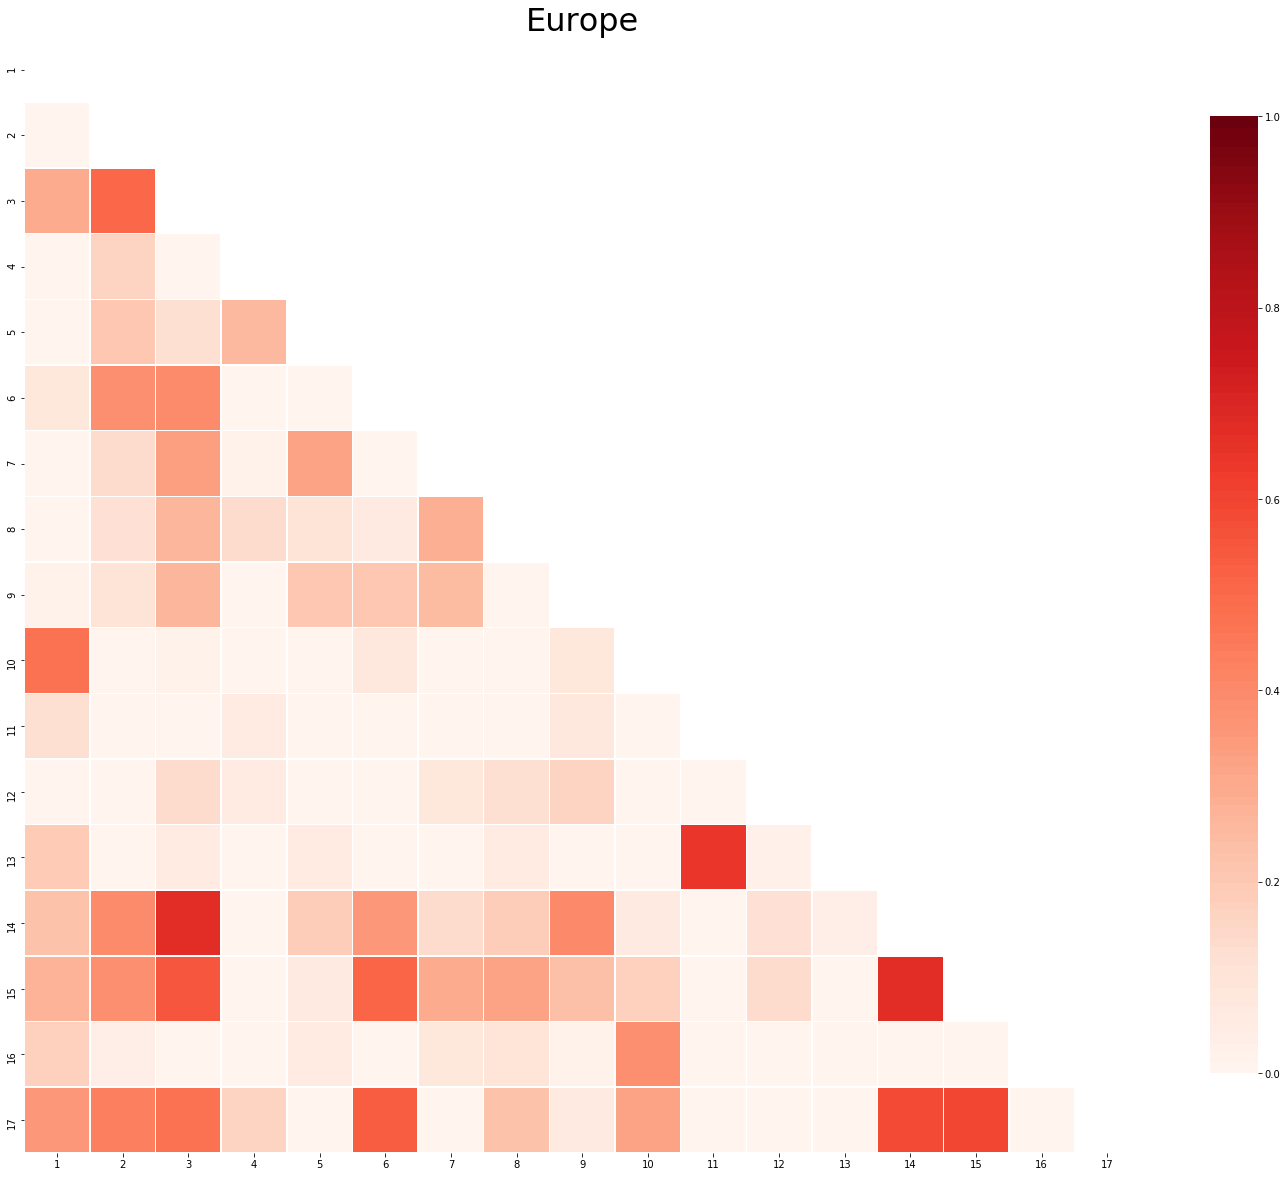

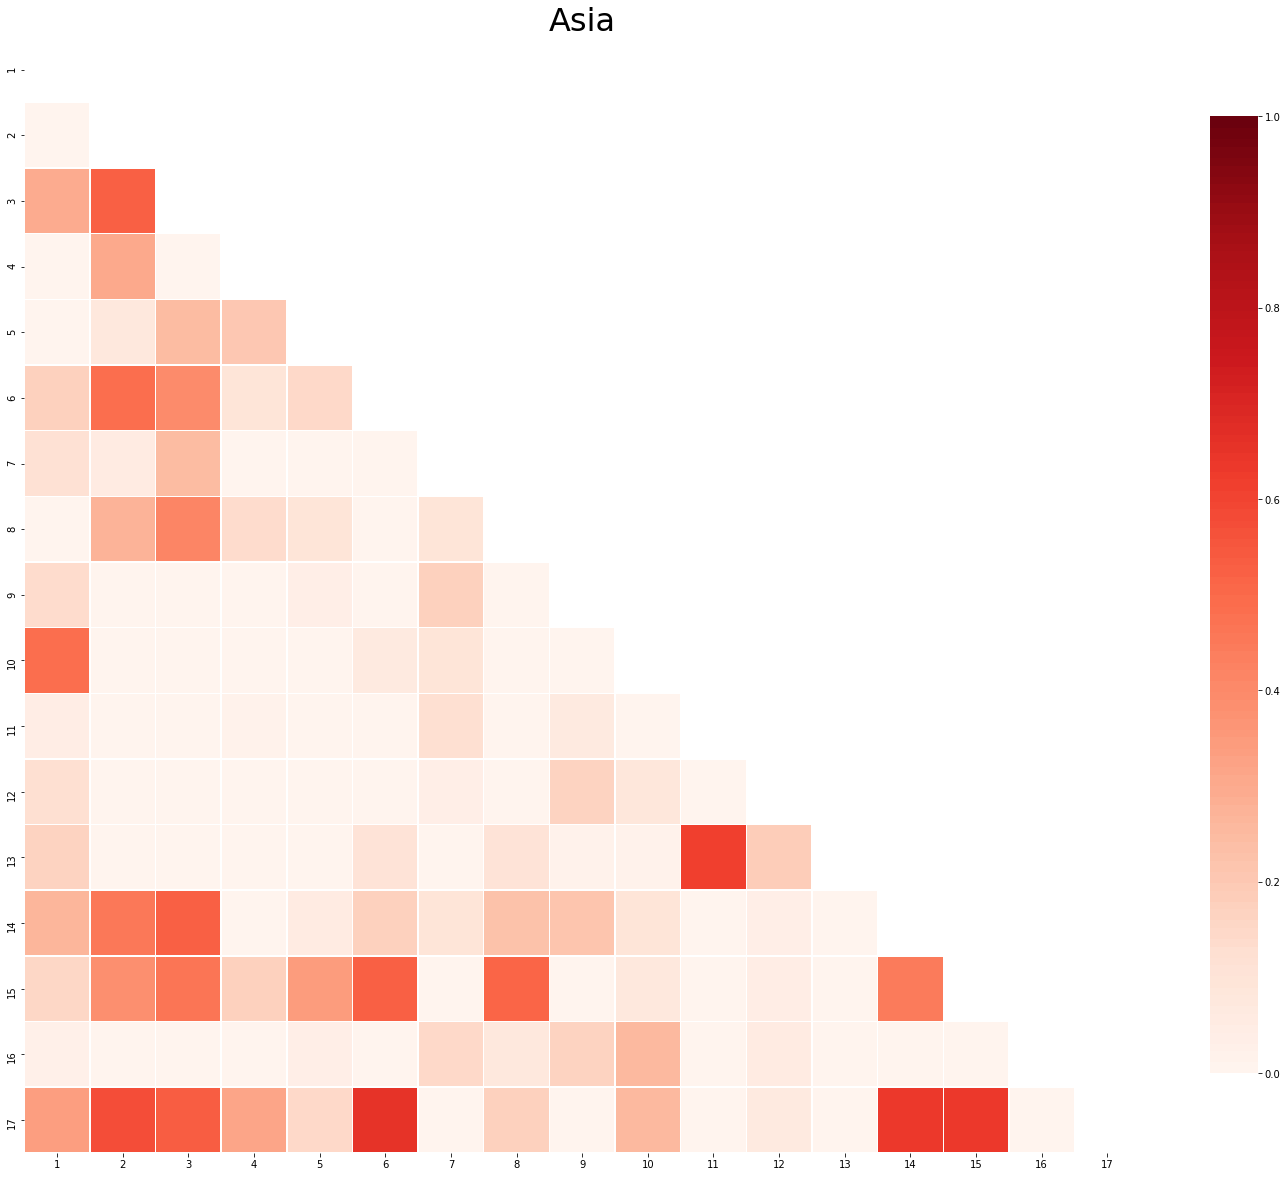

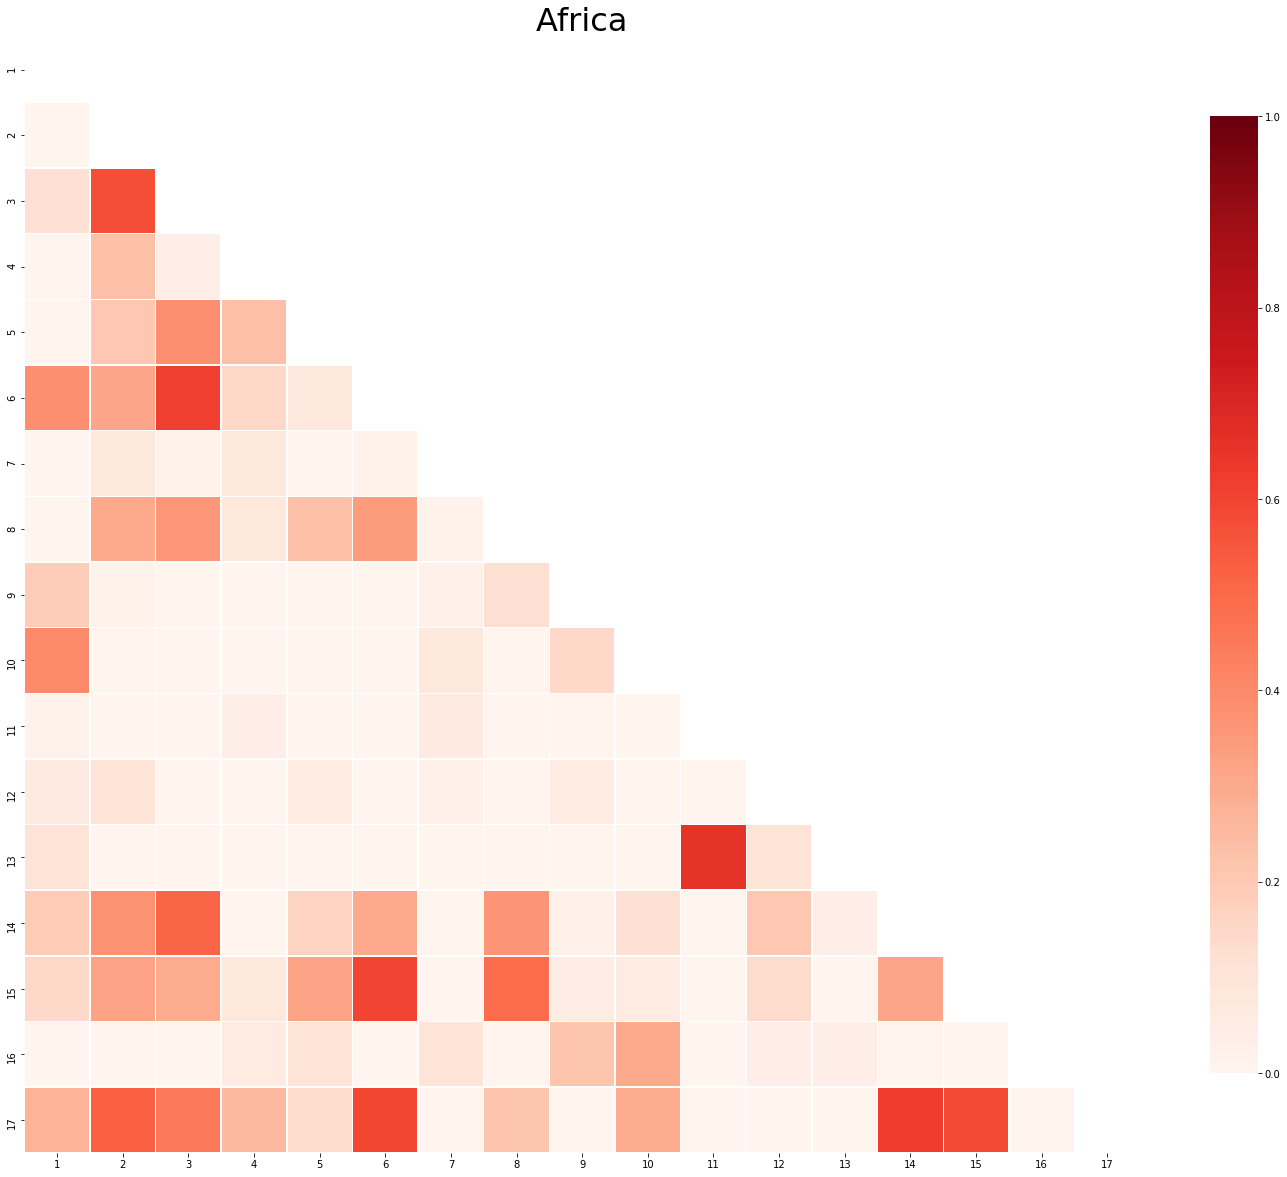

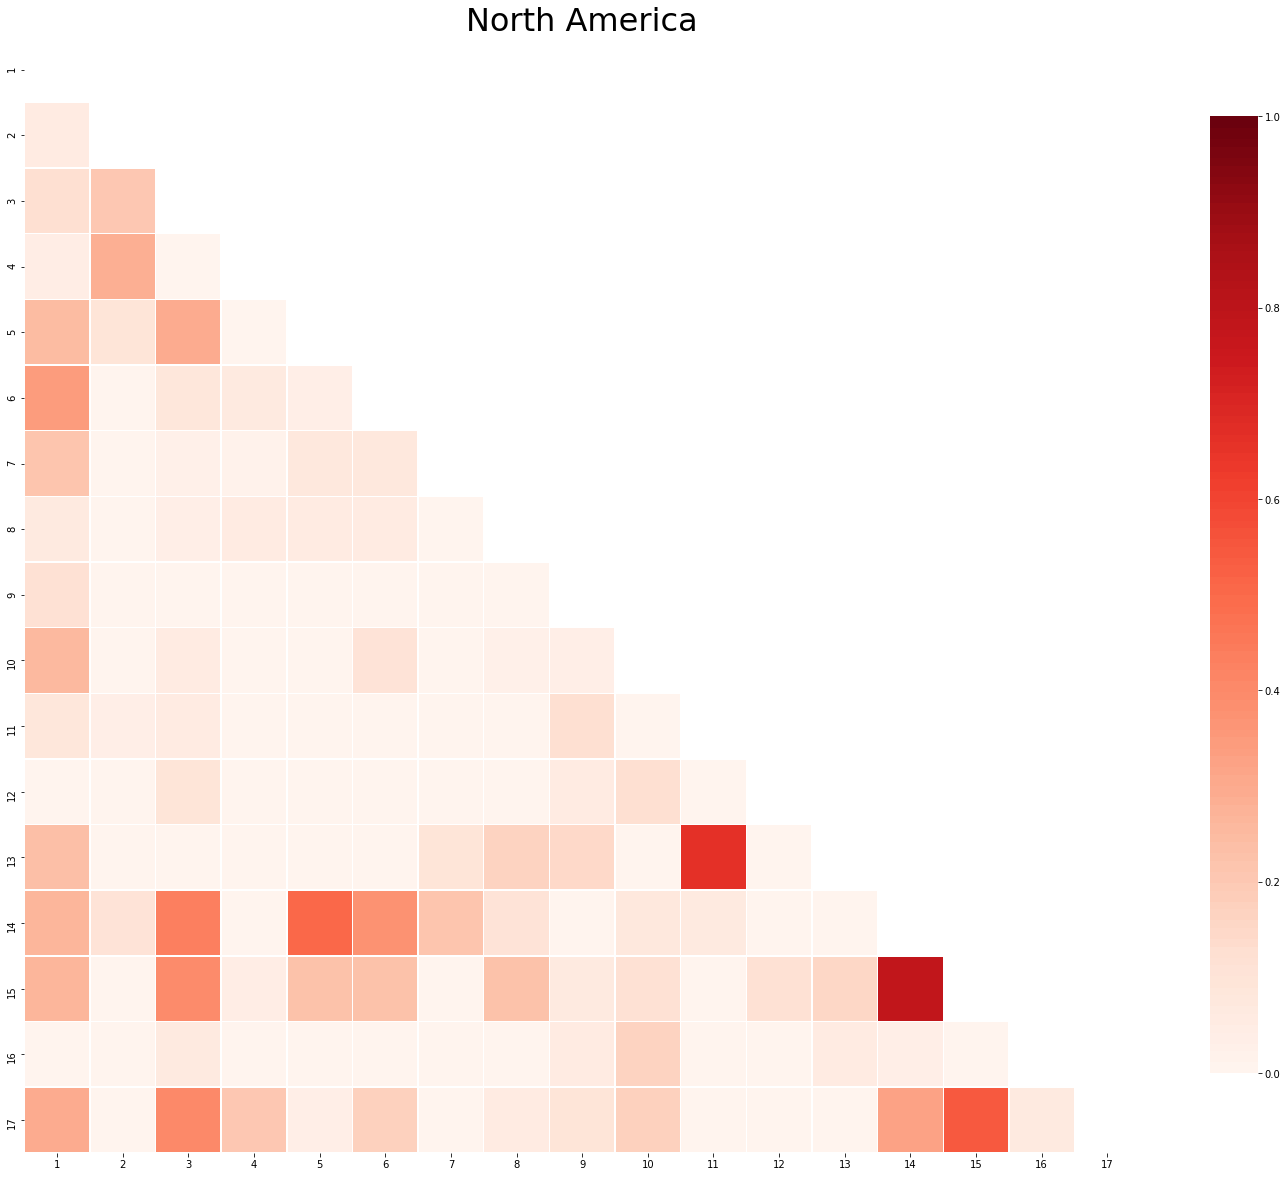

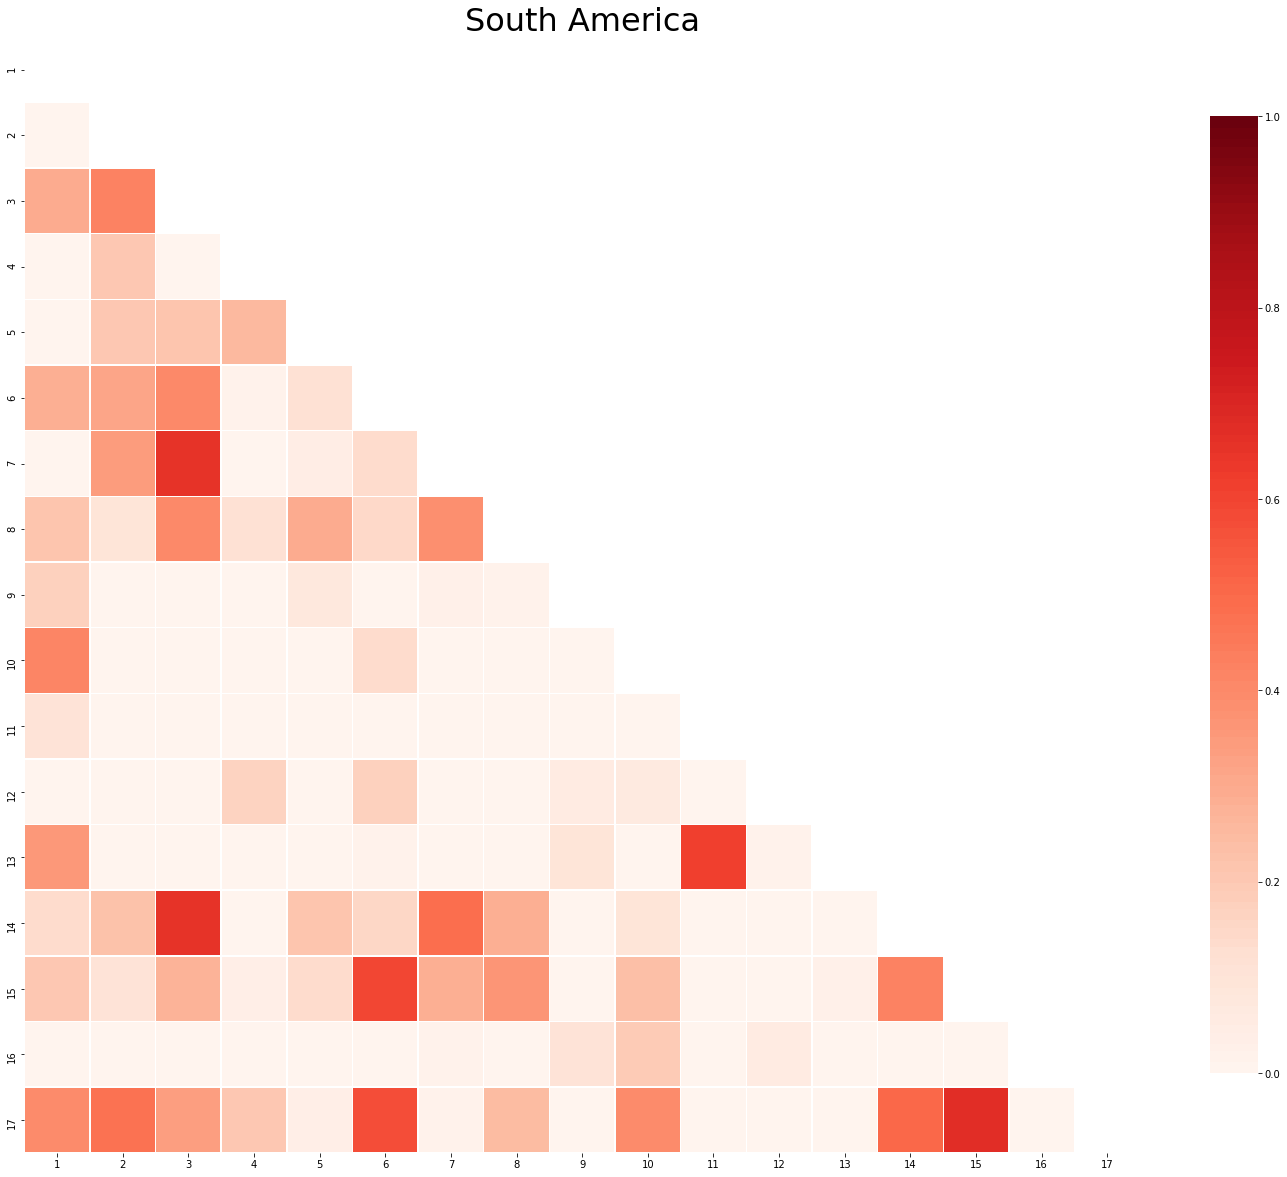

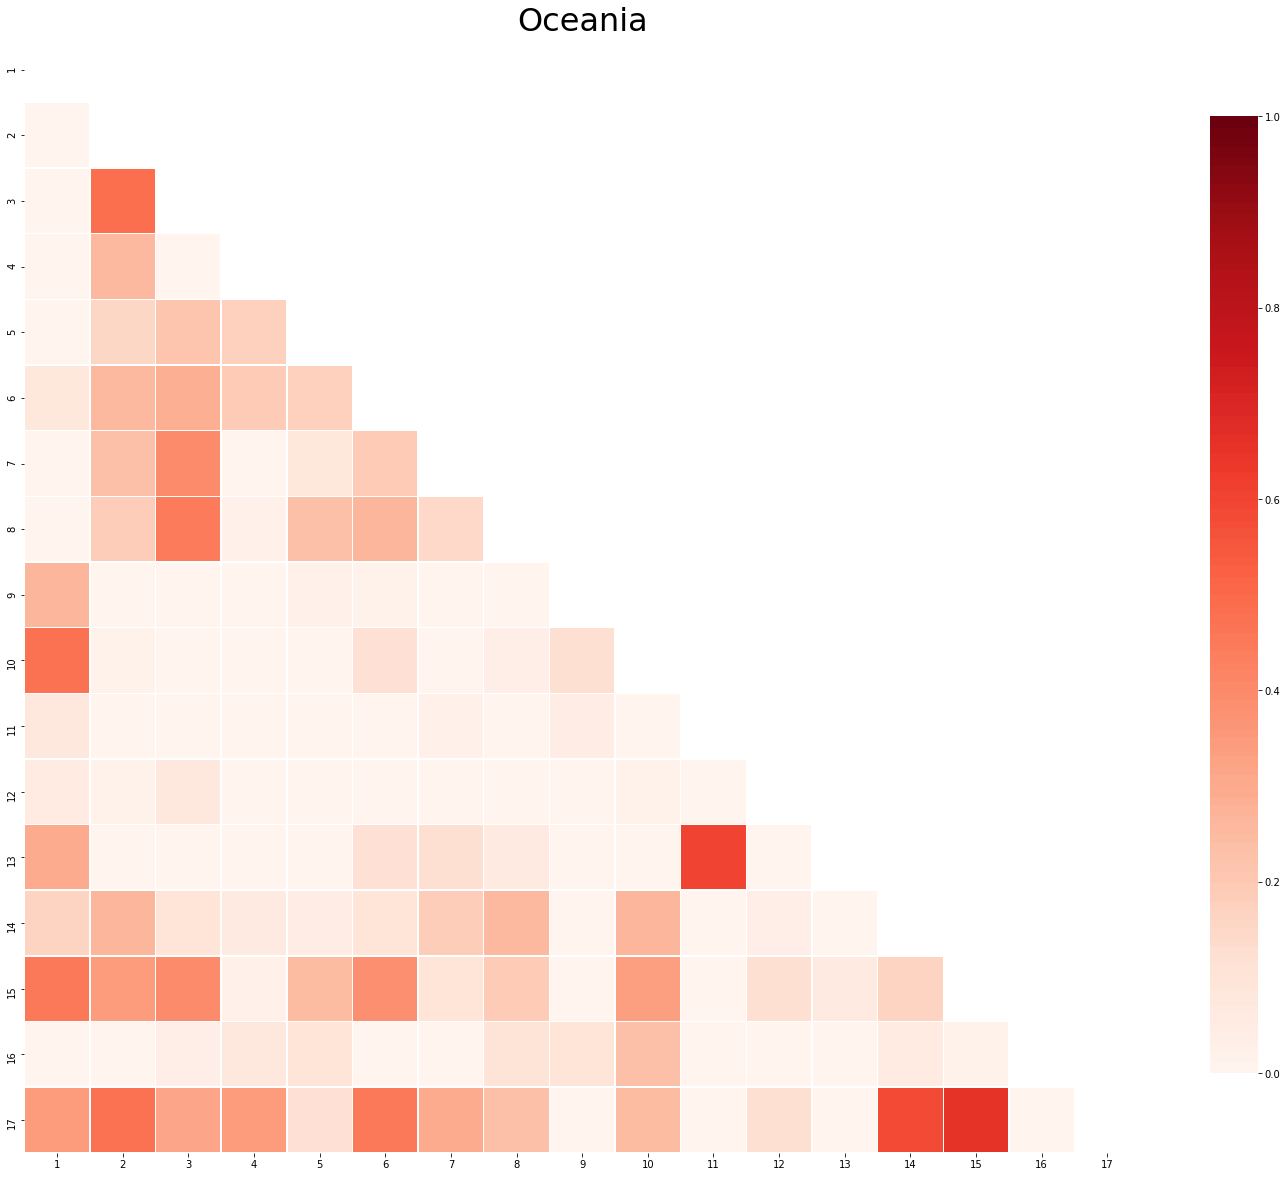

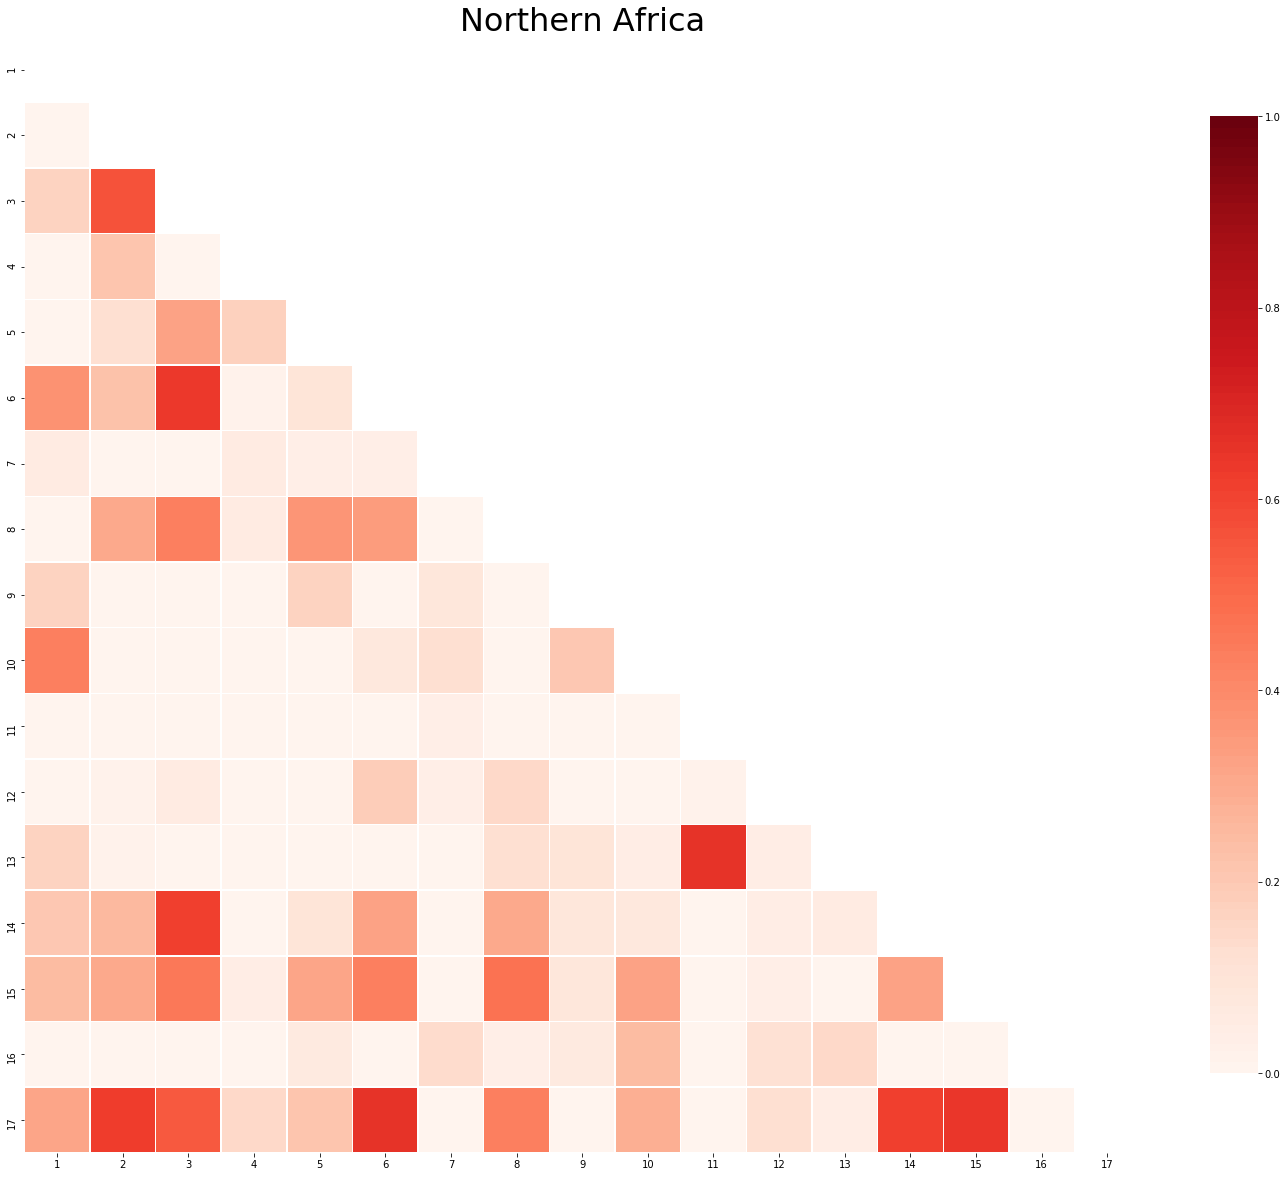

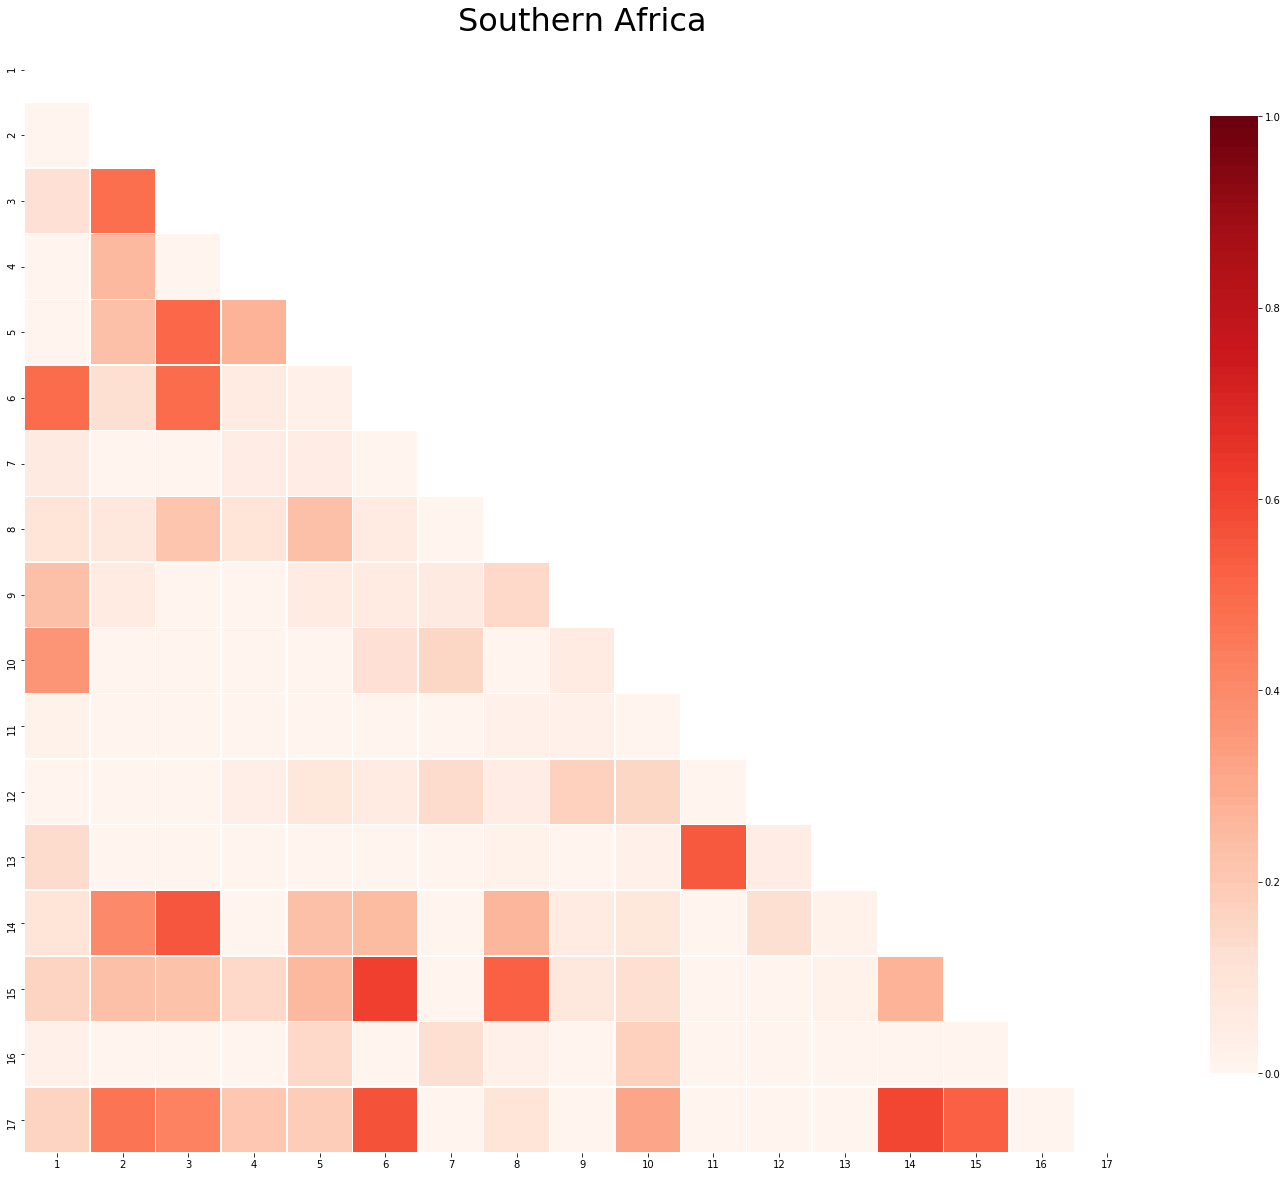

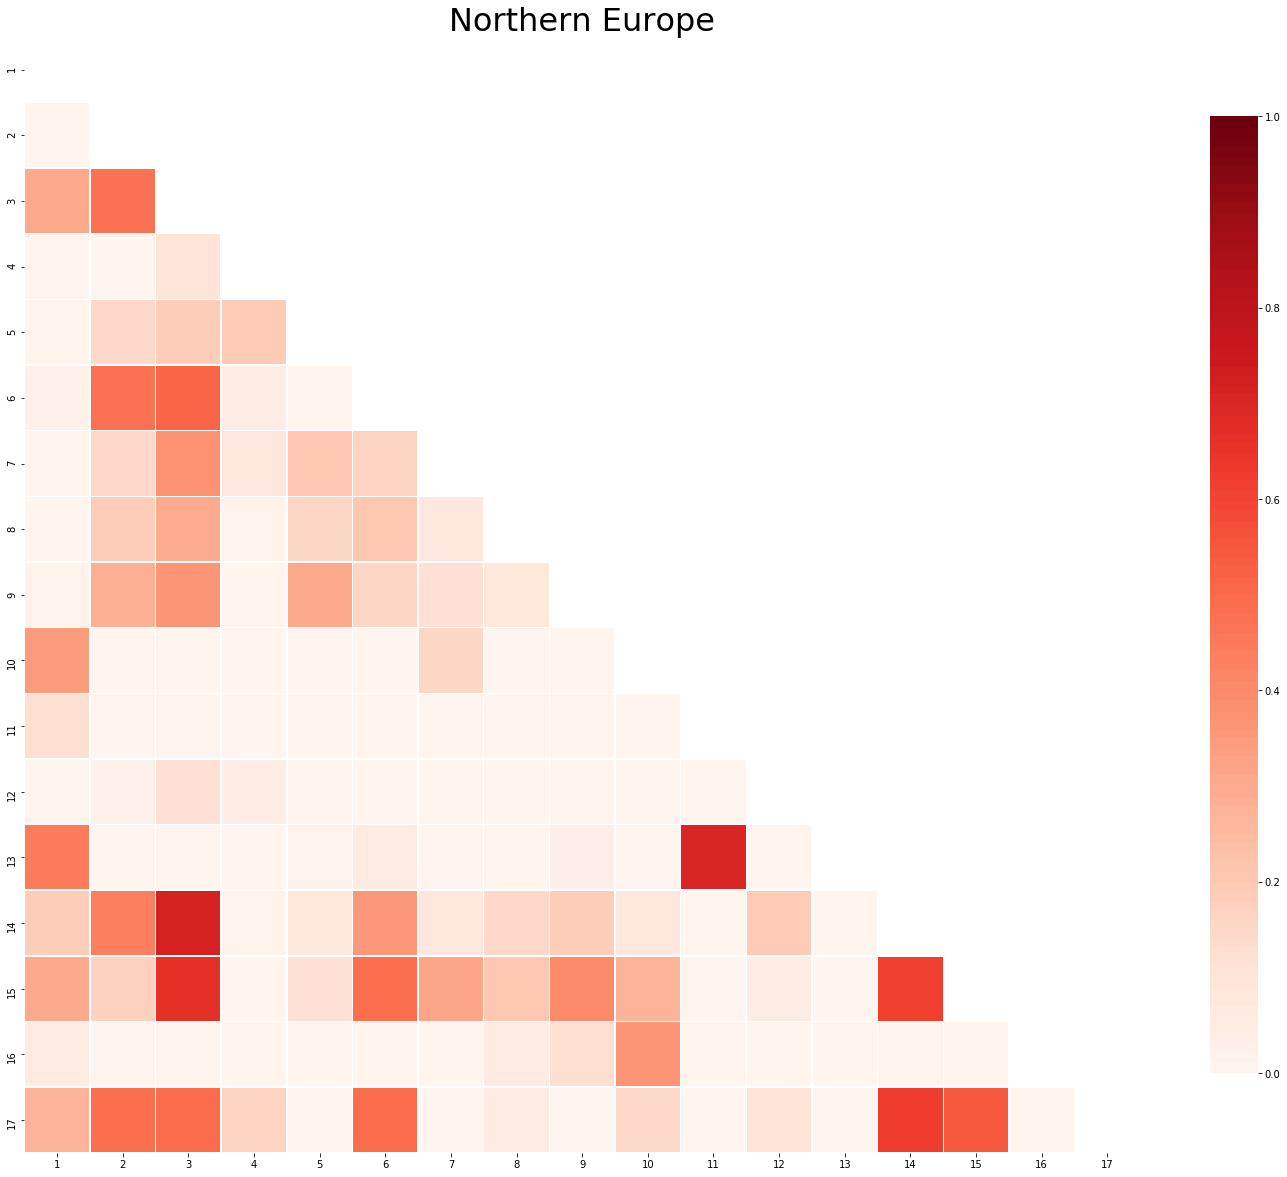

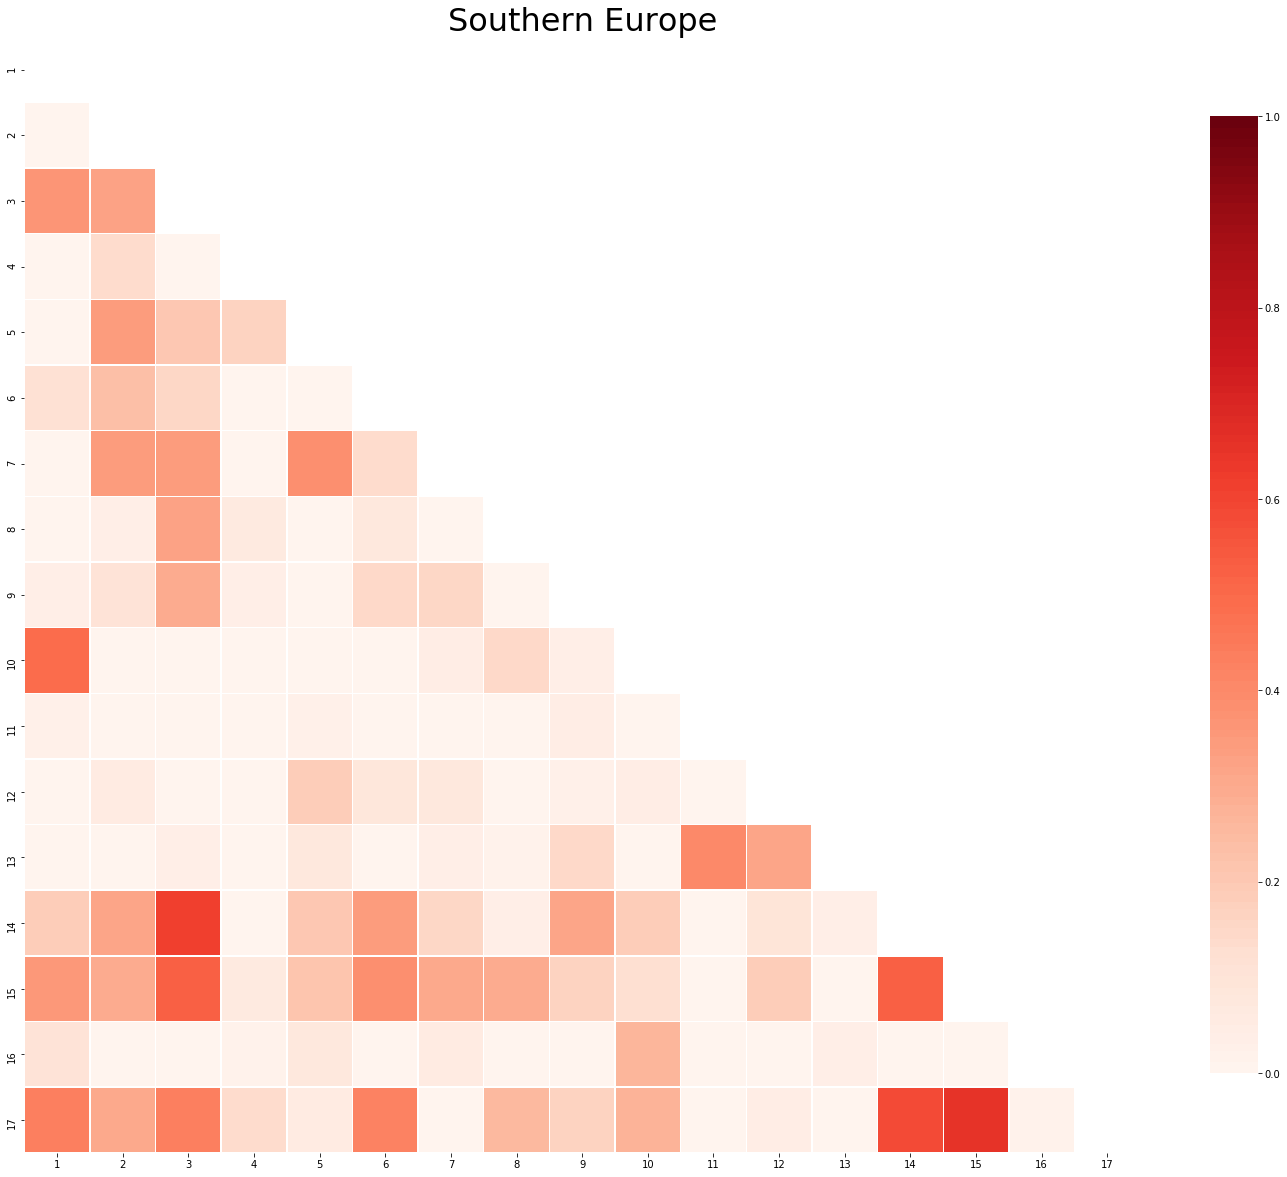

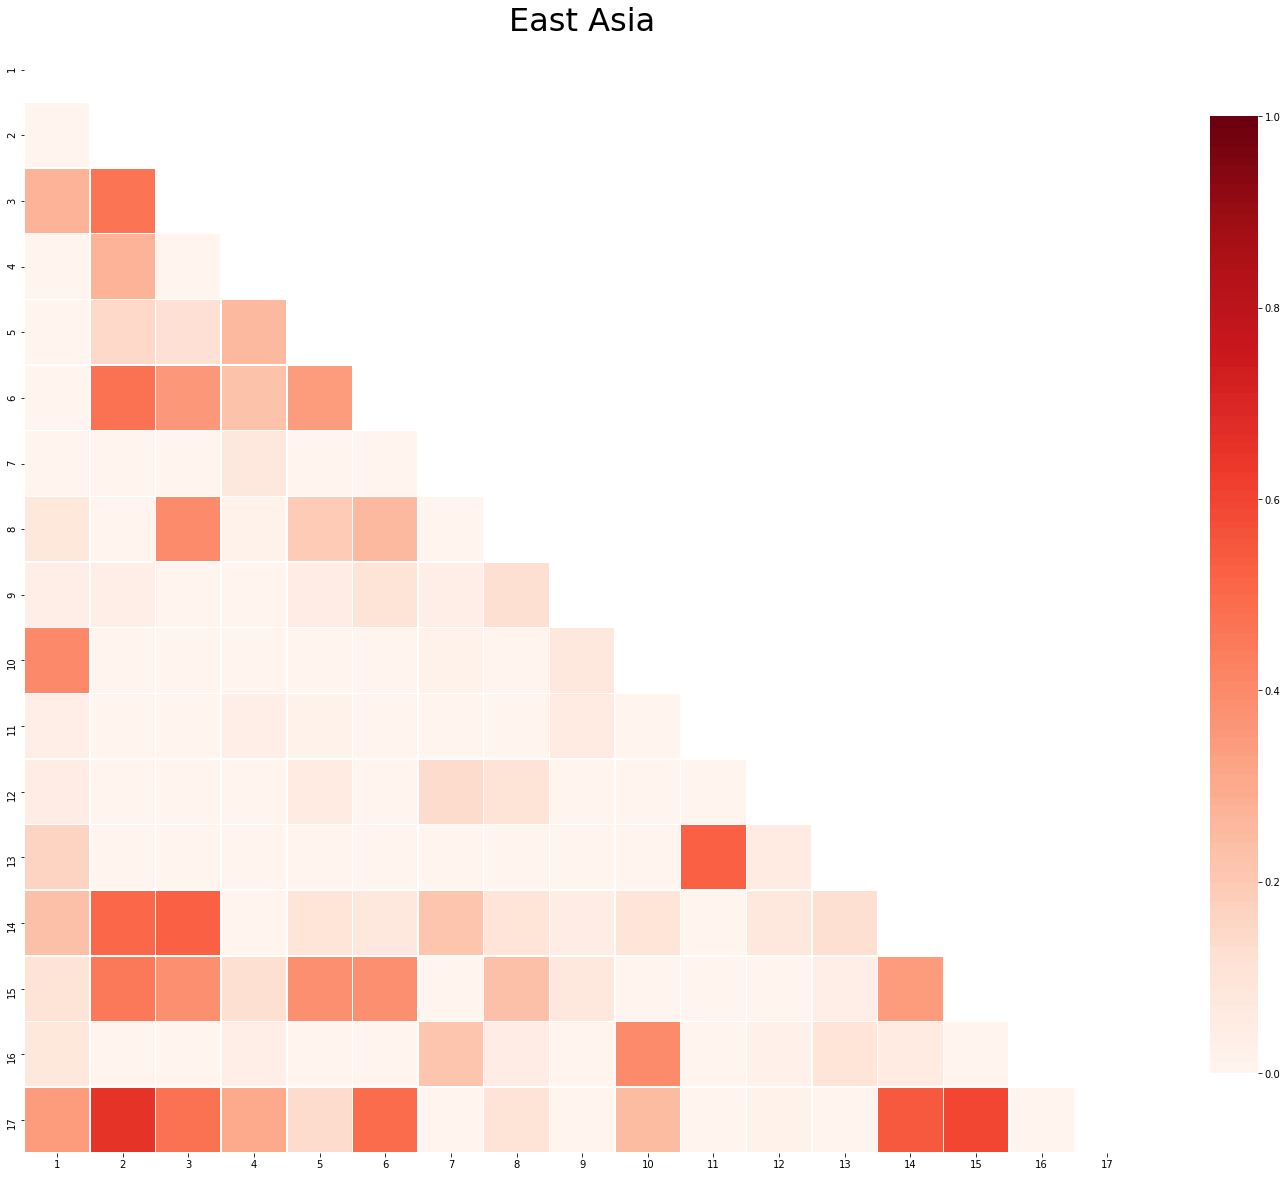

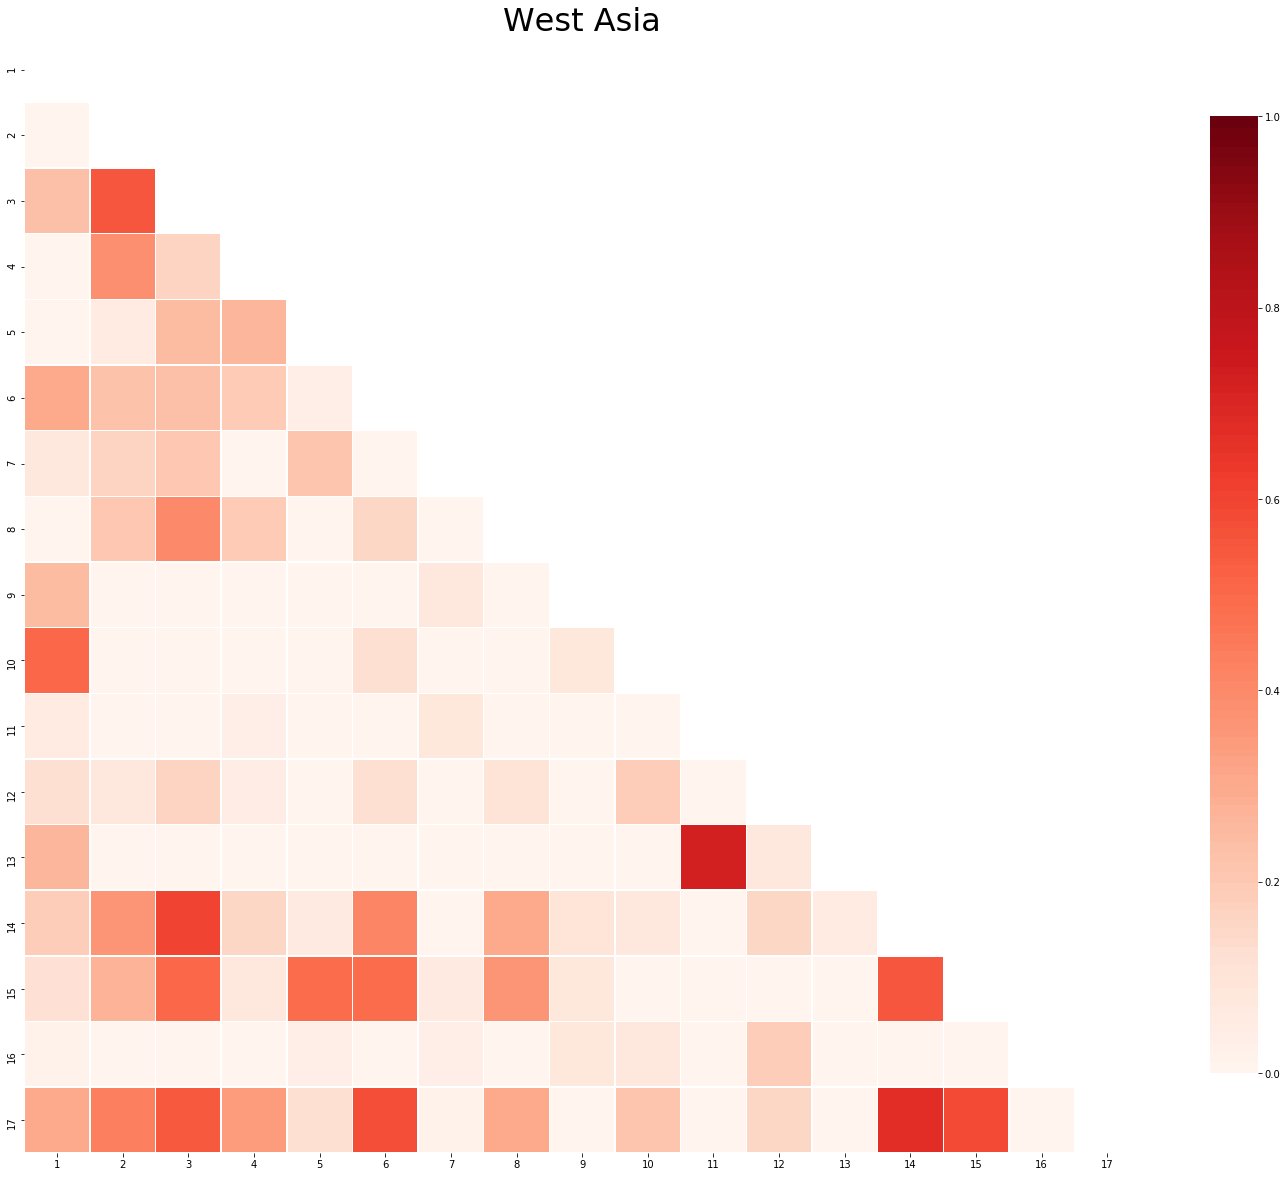

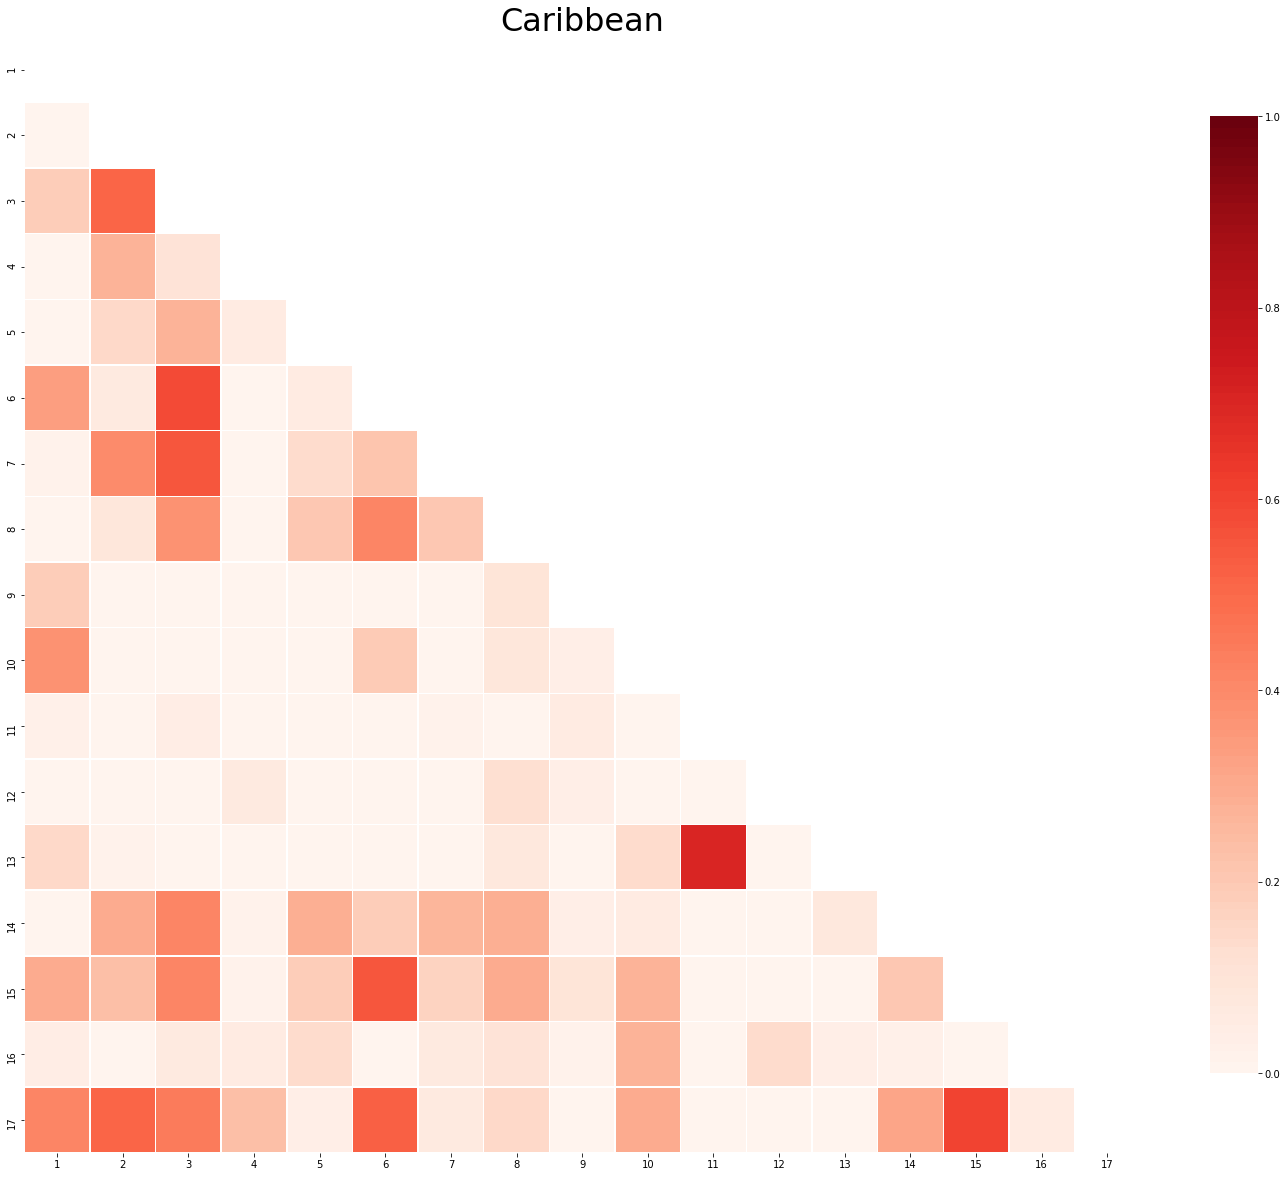

In [61]:
# continents
for continent in continents:
    # generate a mask for the upper triangle
    mask = np.zeros_like(cor_goals_continents_2[continent].fillna(0), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # set up the matplotlib figure
    f, ax = plt.subplots(figsize=(25, 22))

    # generate a custom diverging colormap
    cmap = sns.color_palette("Reds", 100)

    # draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(cor_goals_continents_2[continent].fillna(0), mask=mask, cmap=cmap, vmax=1, center=0.5, vmin=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .8})
    
    plt.title('{}'.format(continent), fontdict={'fontsize': 32})
    plt.savefig('distance_cor/goals/{}_cor_goals.png'.format(continent))

Additionally to these matrices we also plot the distance correlations as networks.

In [63]:
# data preparation for networkX
dcor_dict_g = {}

for continent in cor_goals_continents_2.keys():
    dcor_dict_g[continent] = {}

    for goalcombination in goalcombinations_2:
        dcor_dict_g[continent][goalcombination] = cor_goals_continents_2[continent].loc[goalcombination[1], goalcombination[0]]

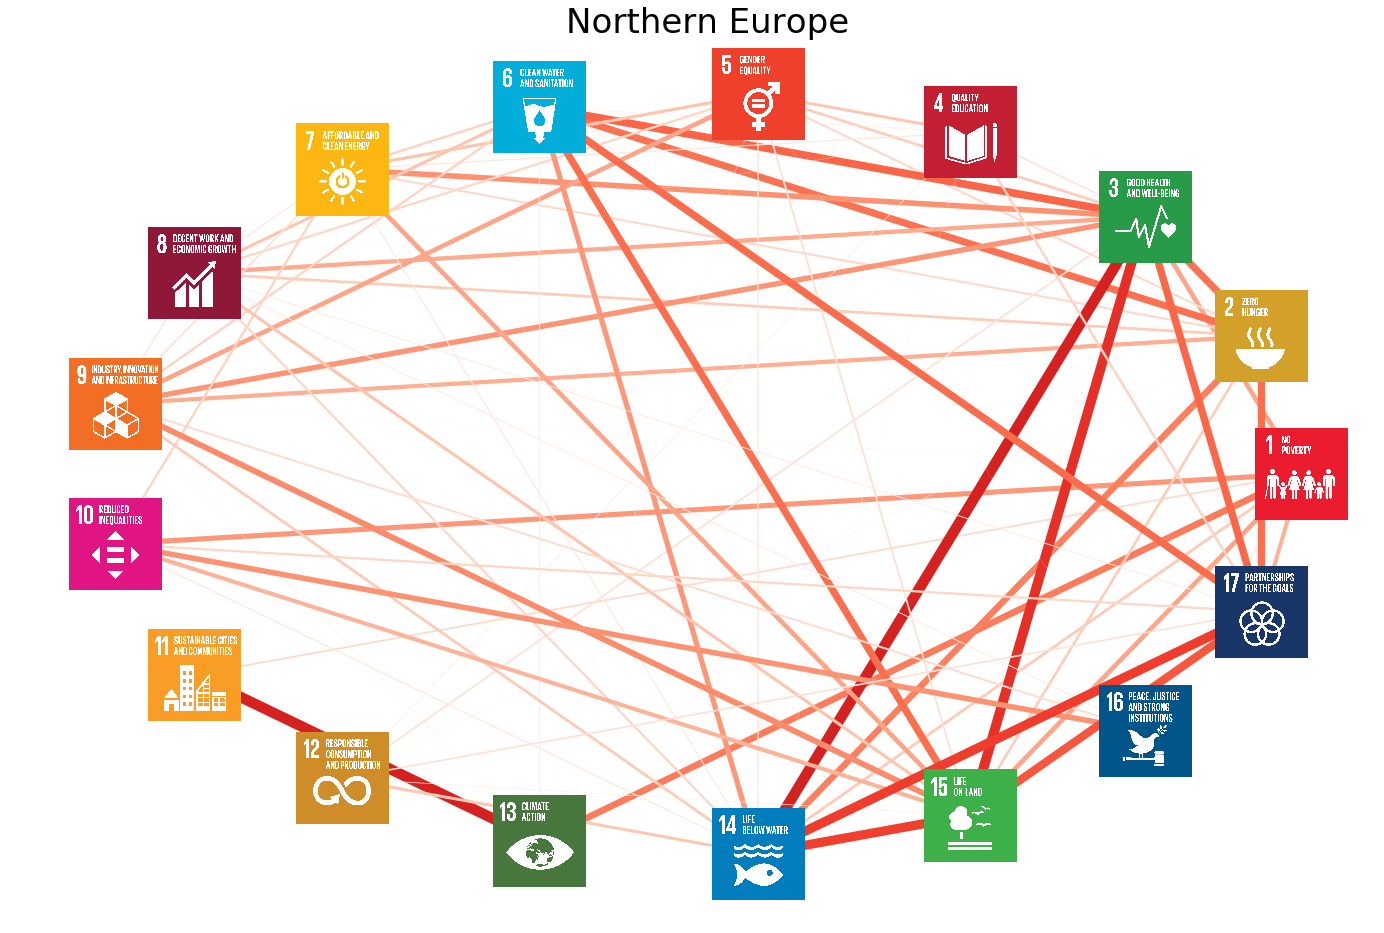

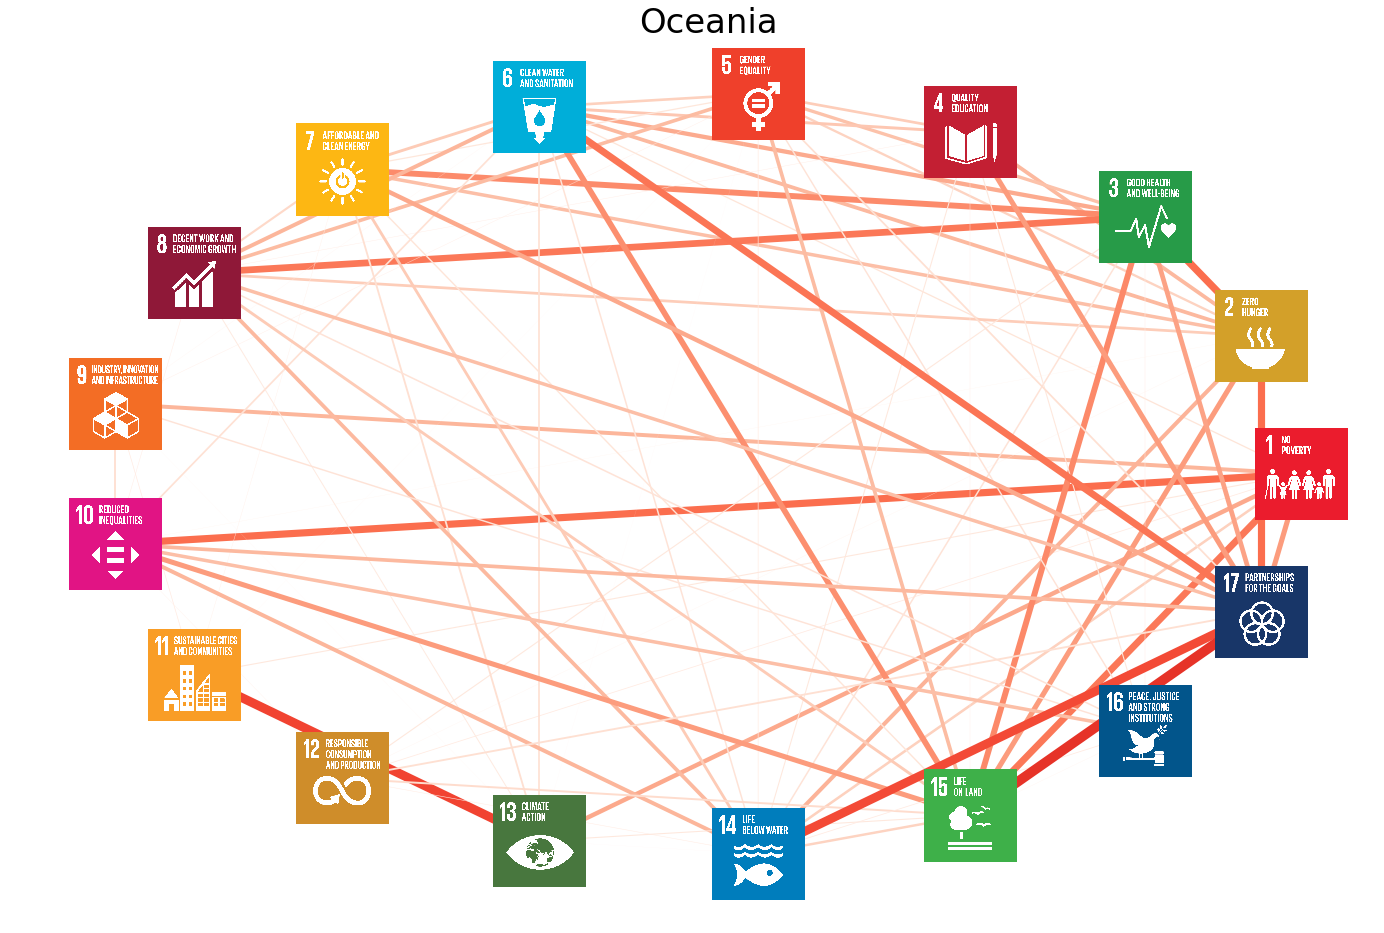

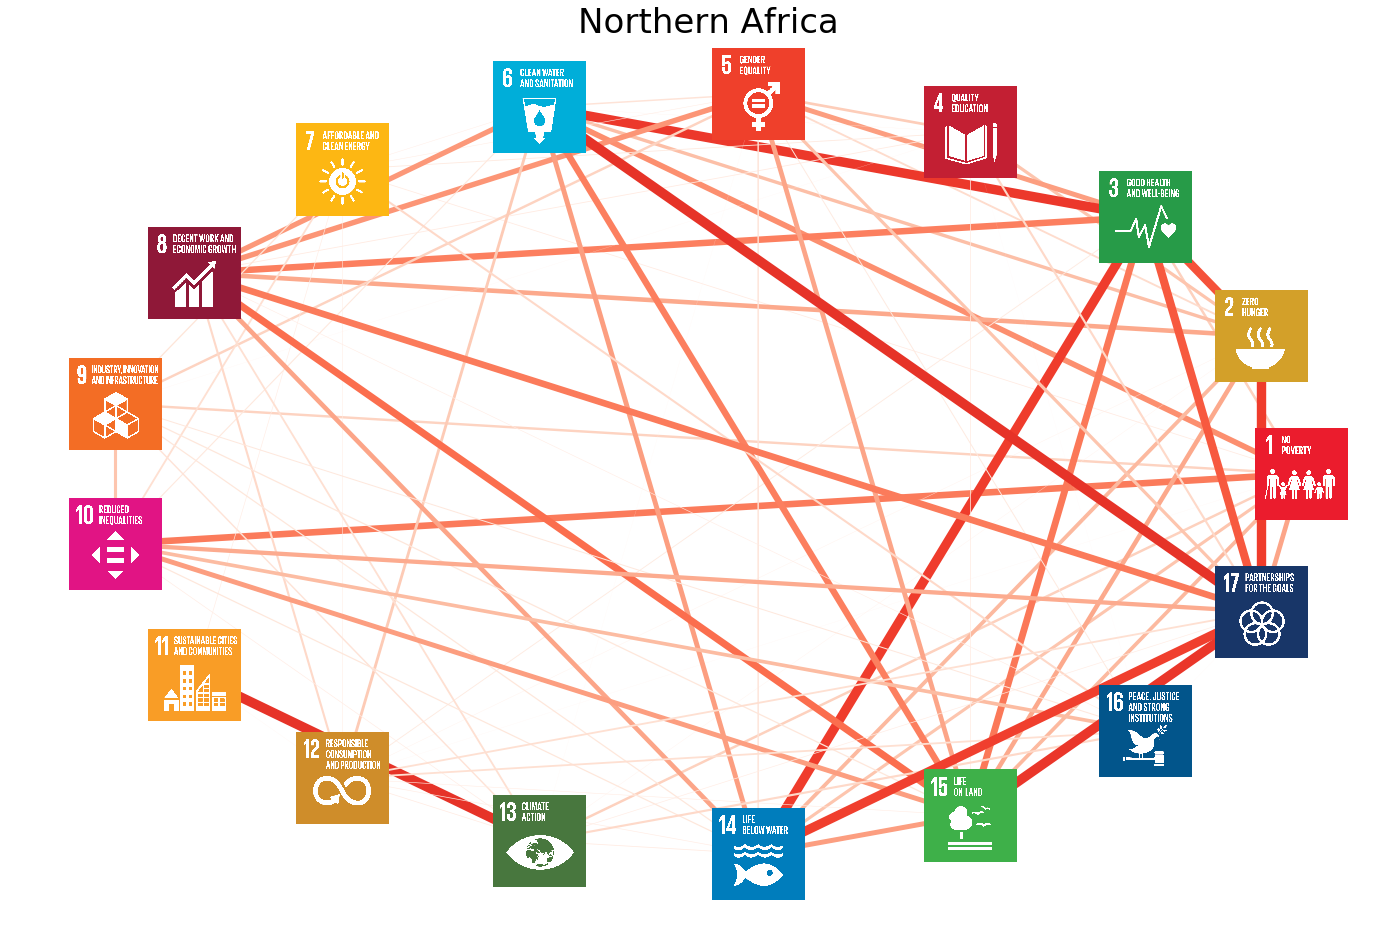

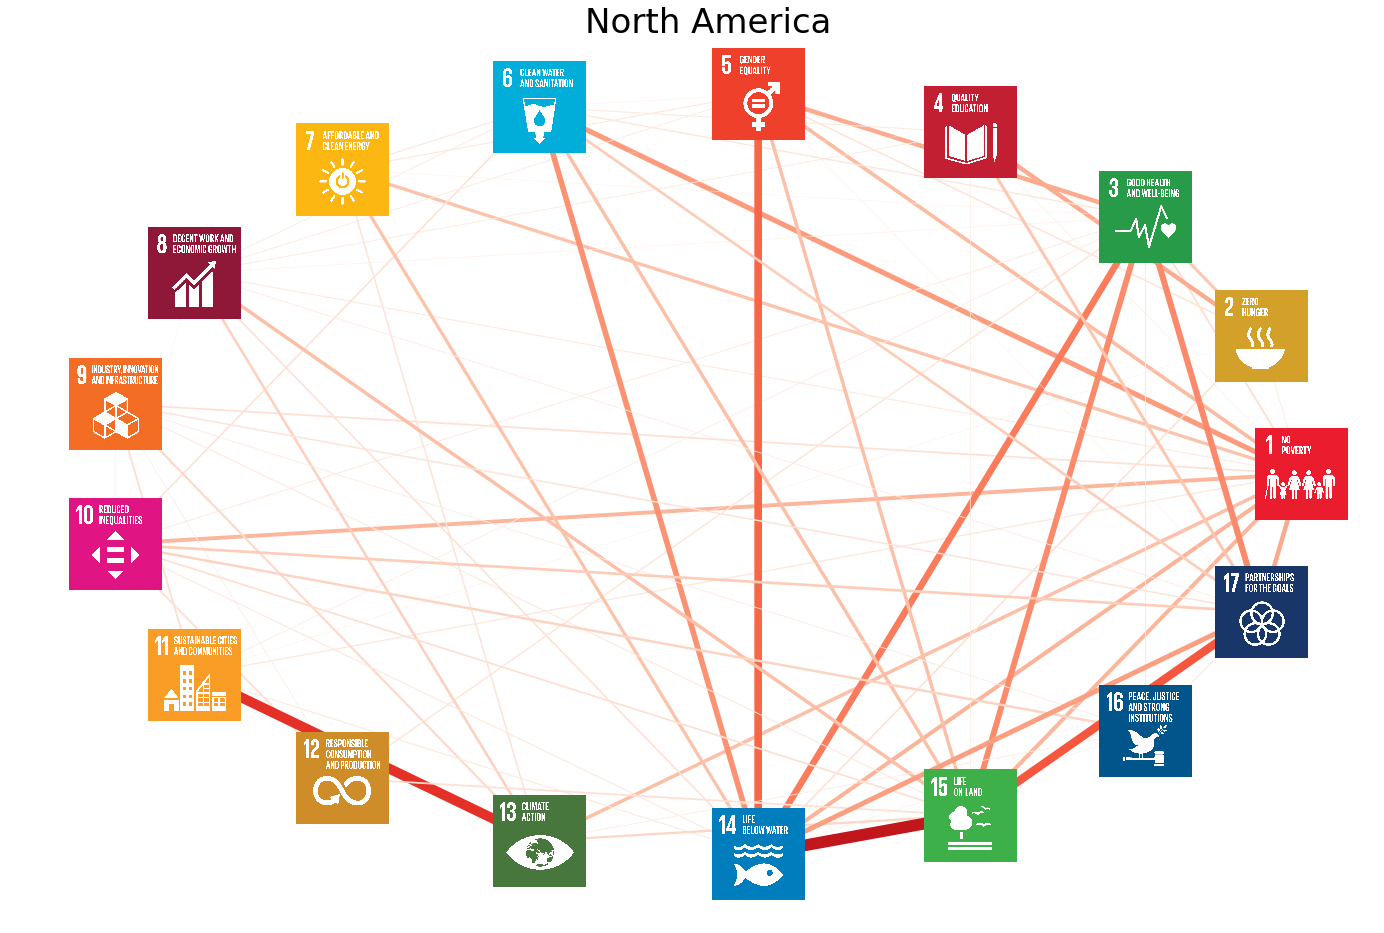

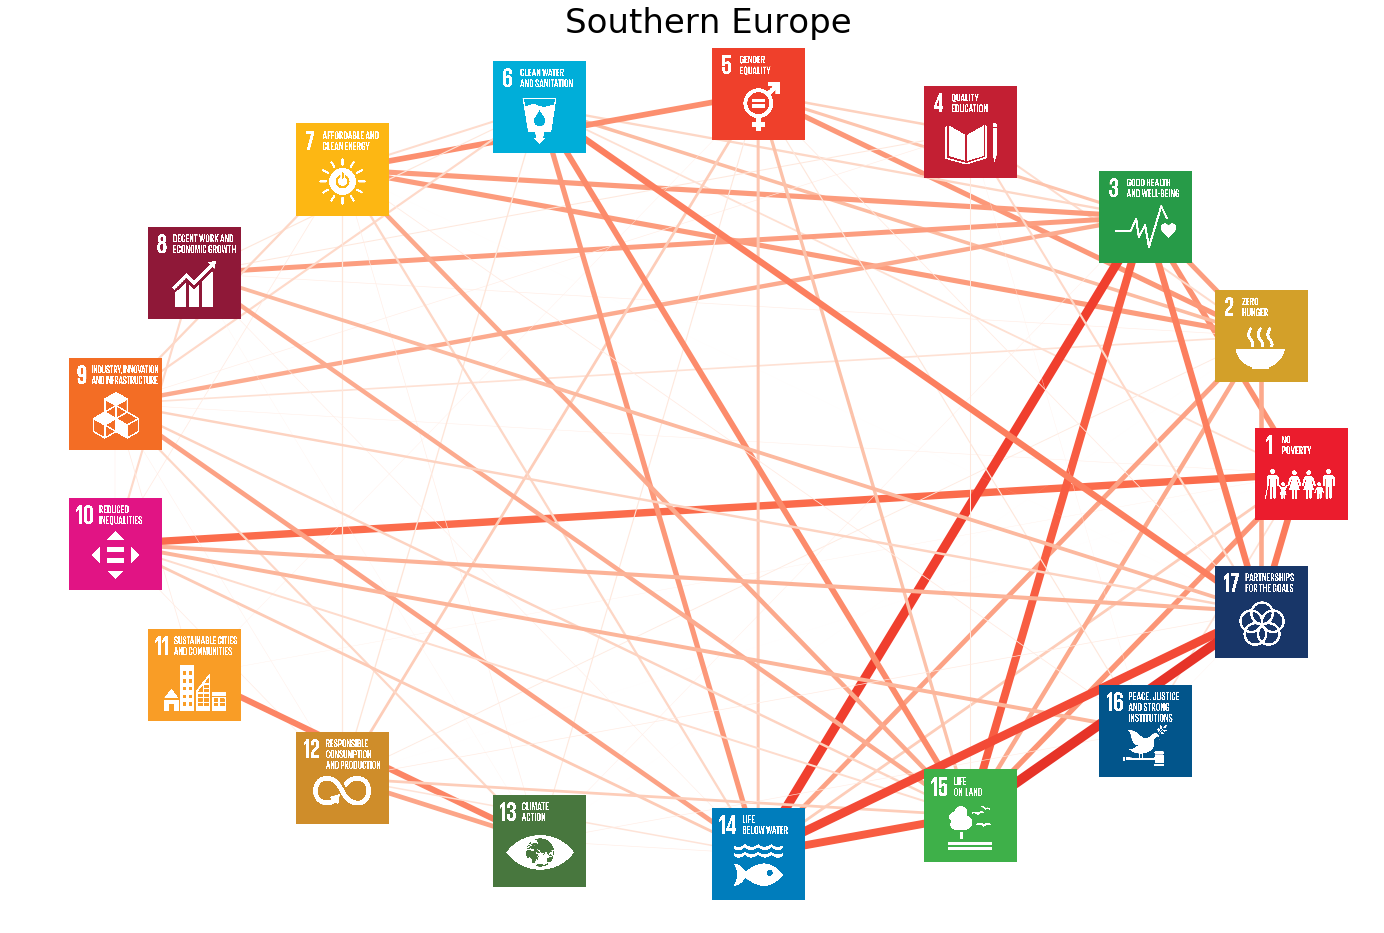

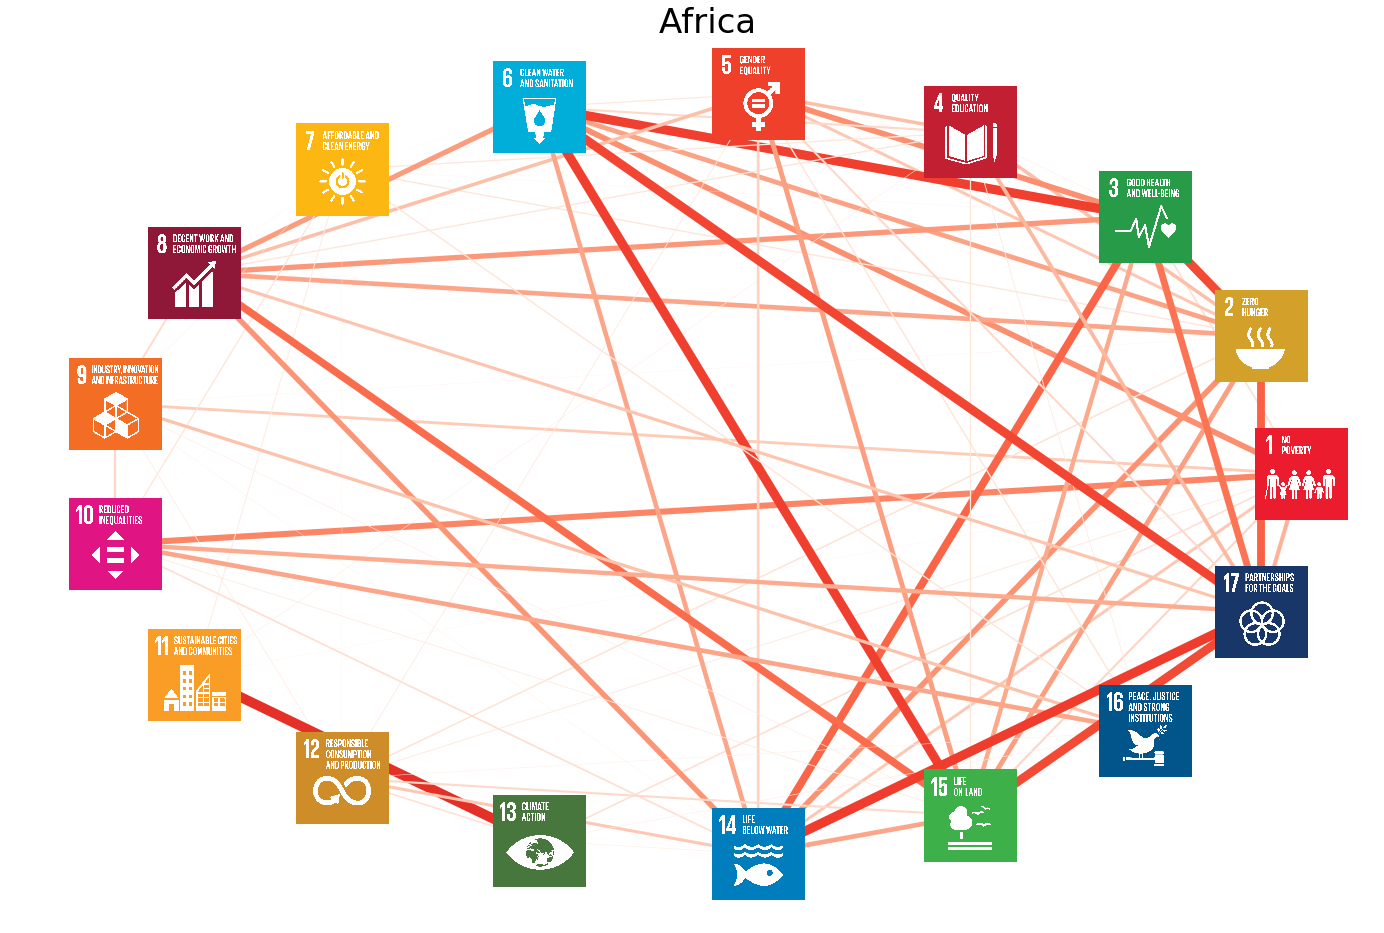

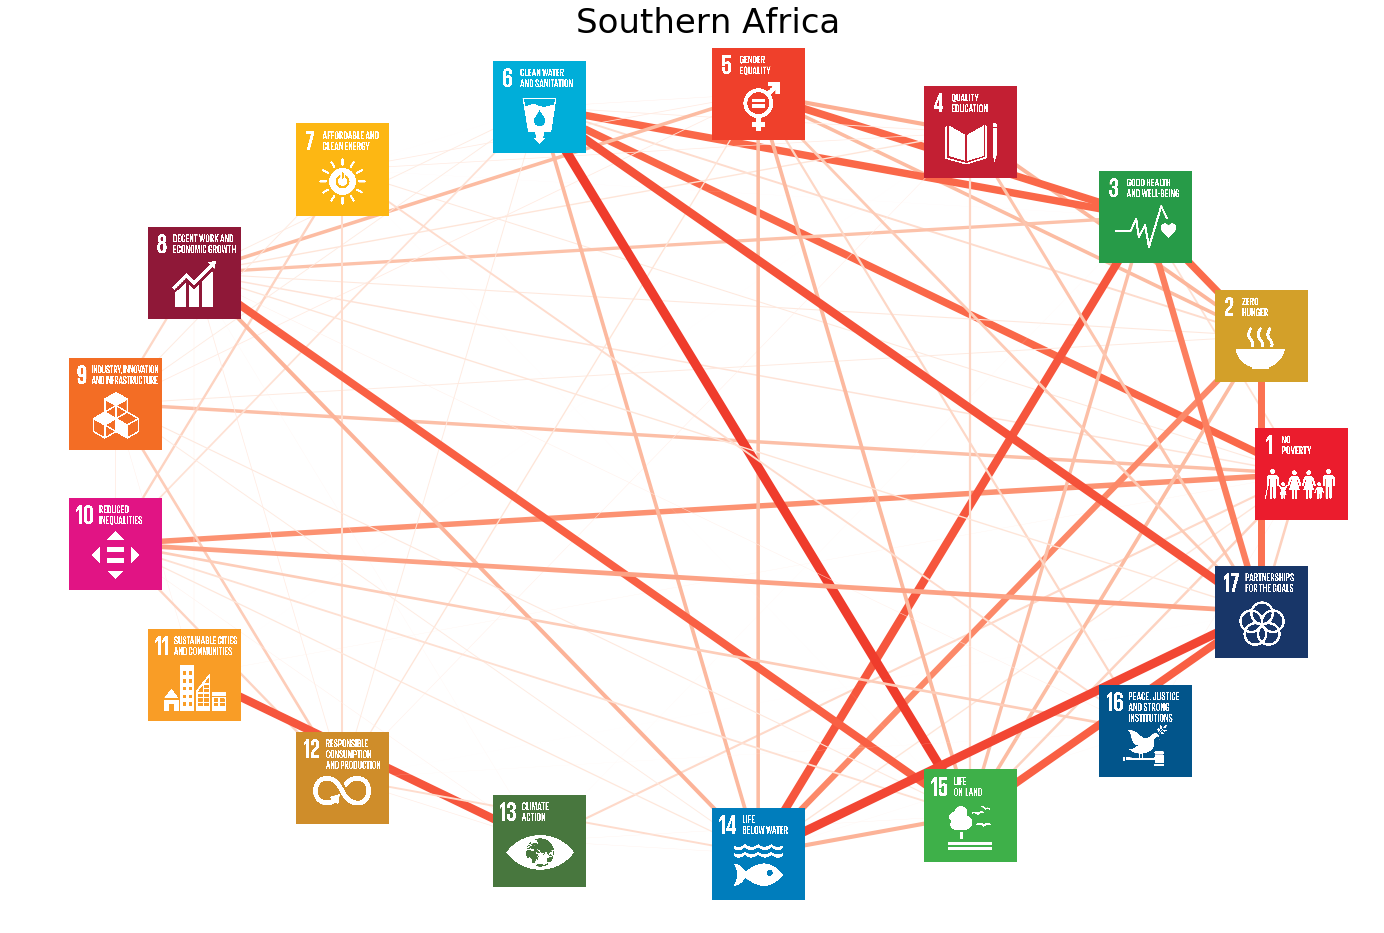

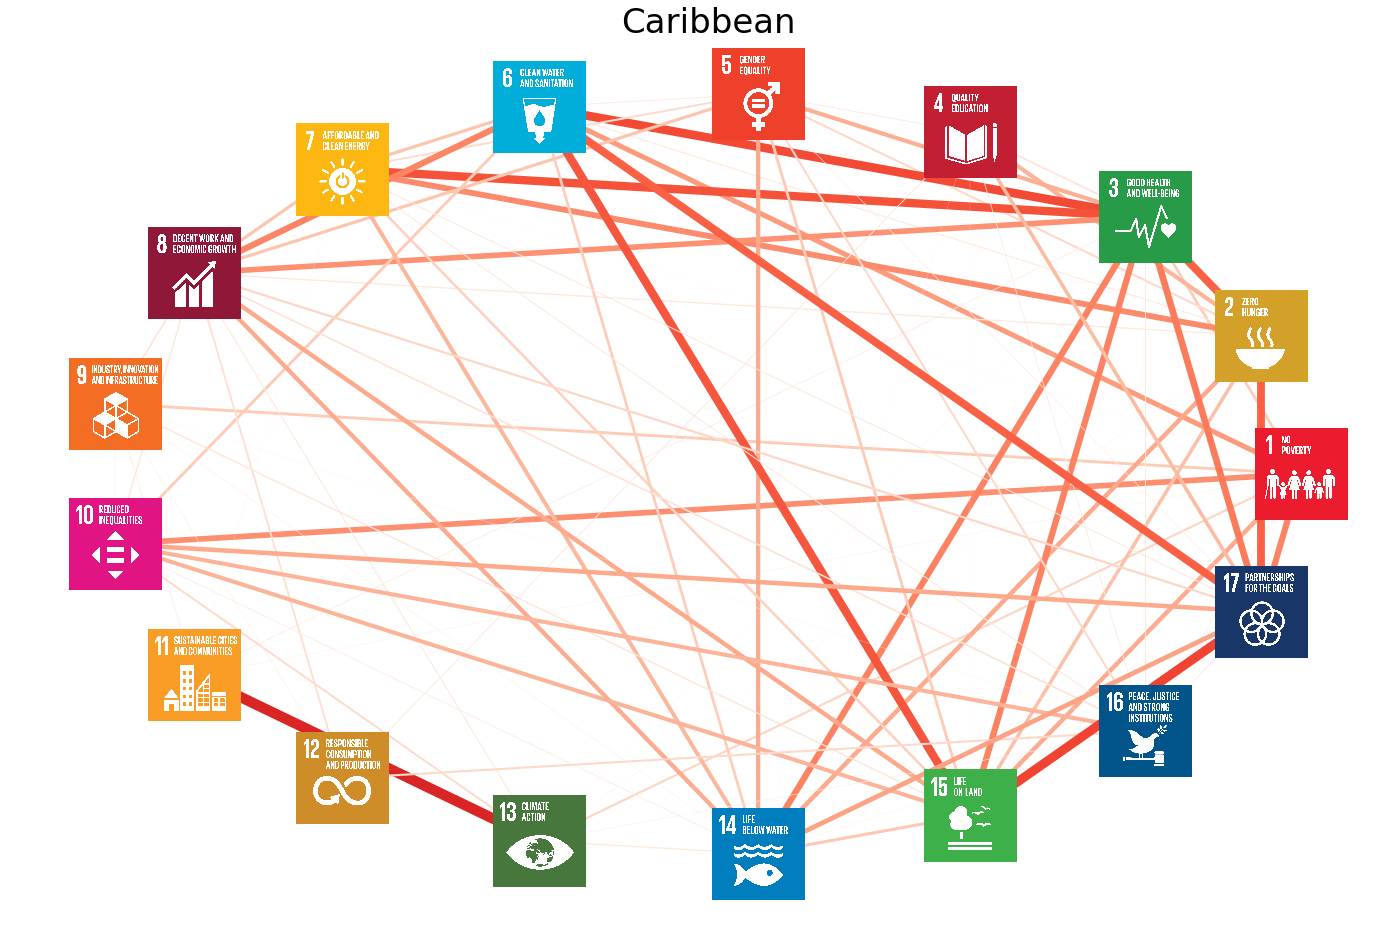

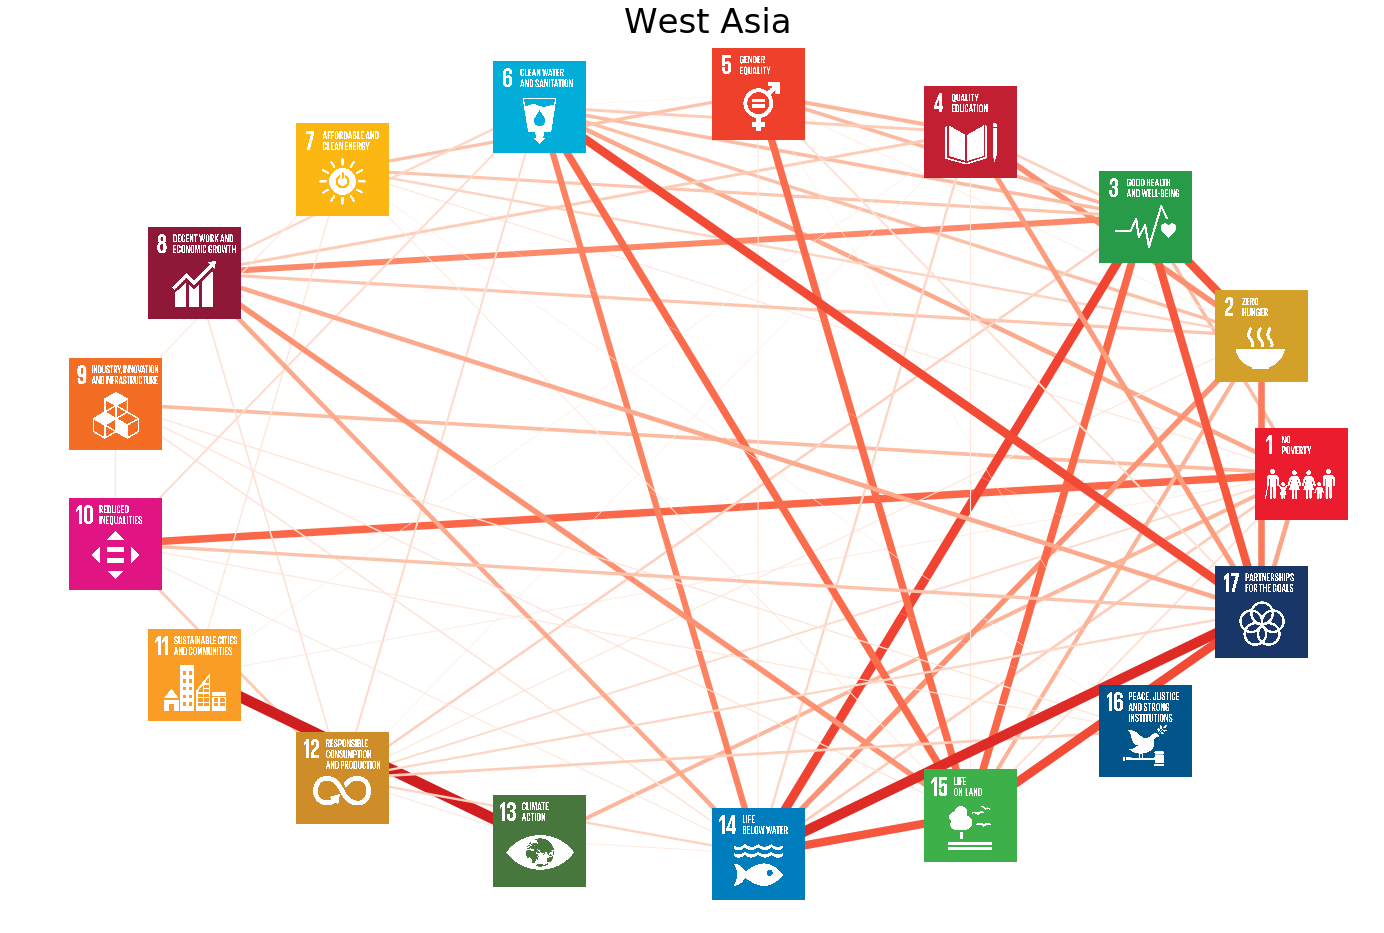

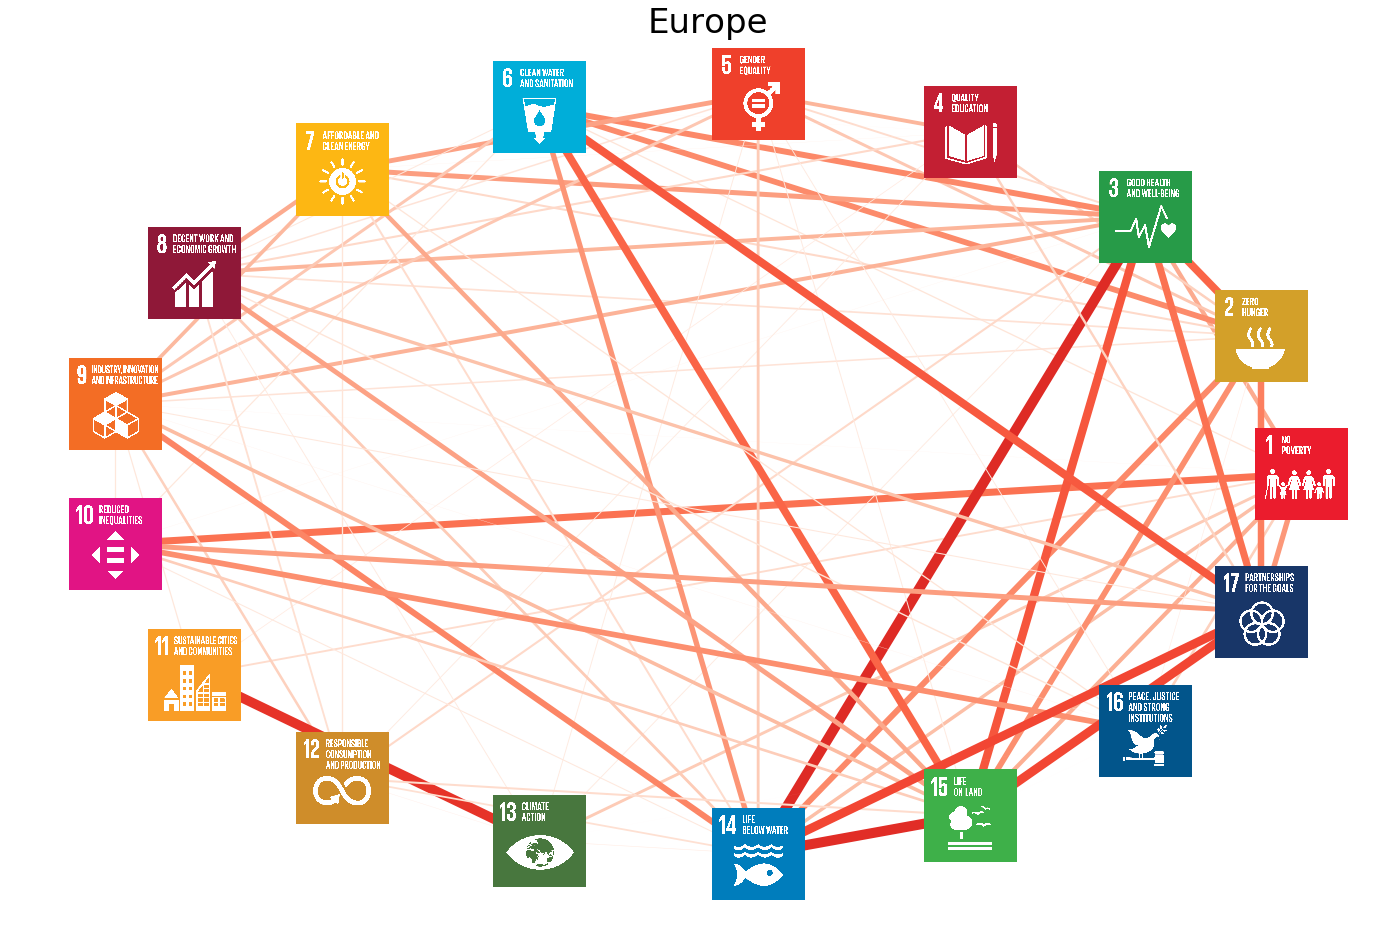

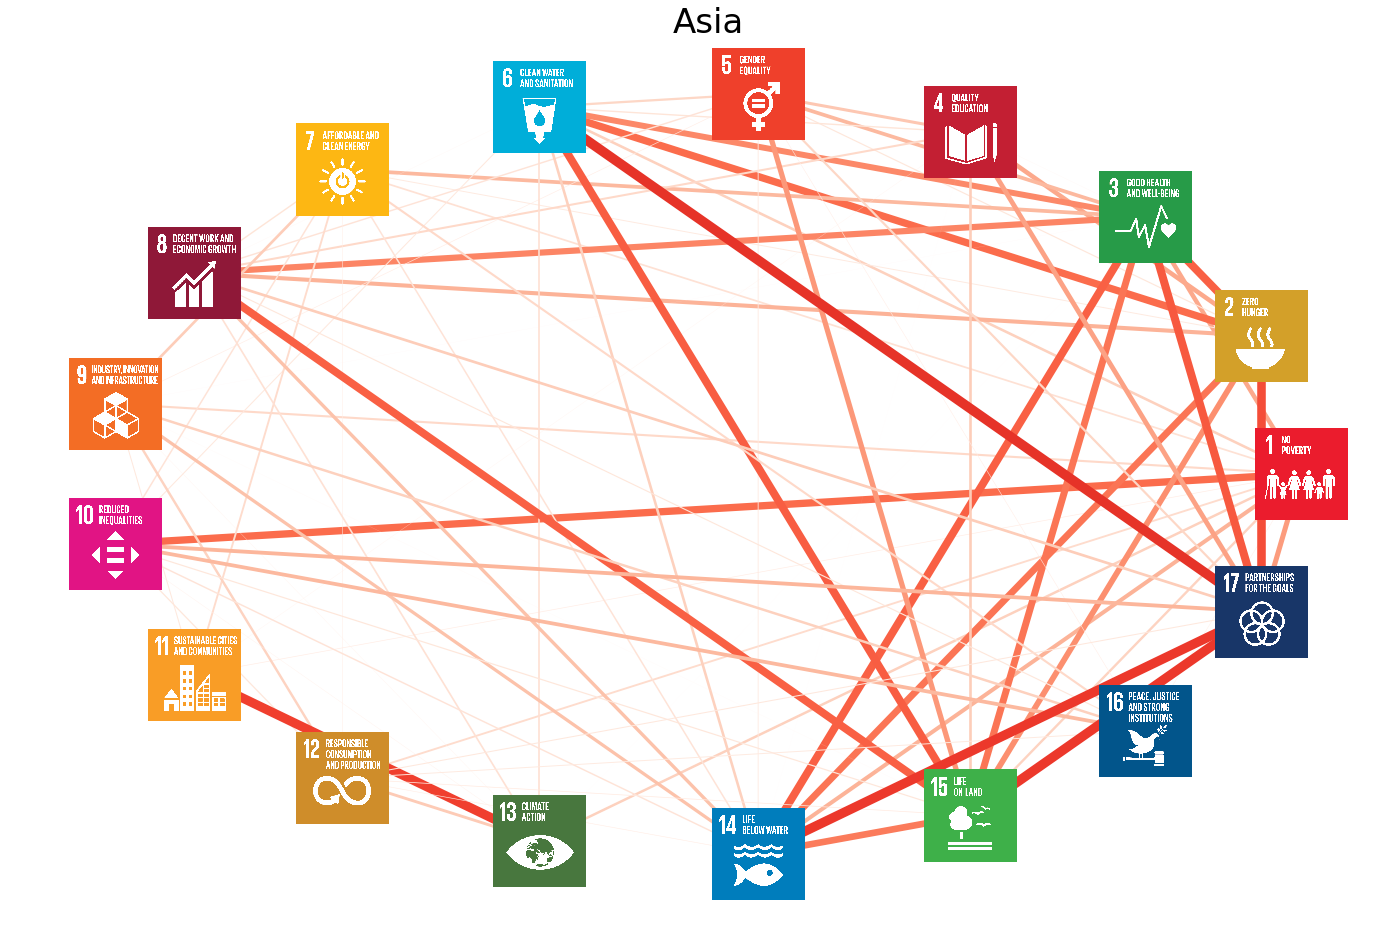

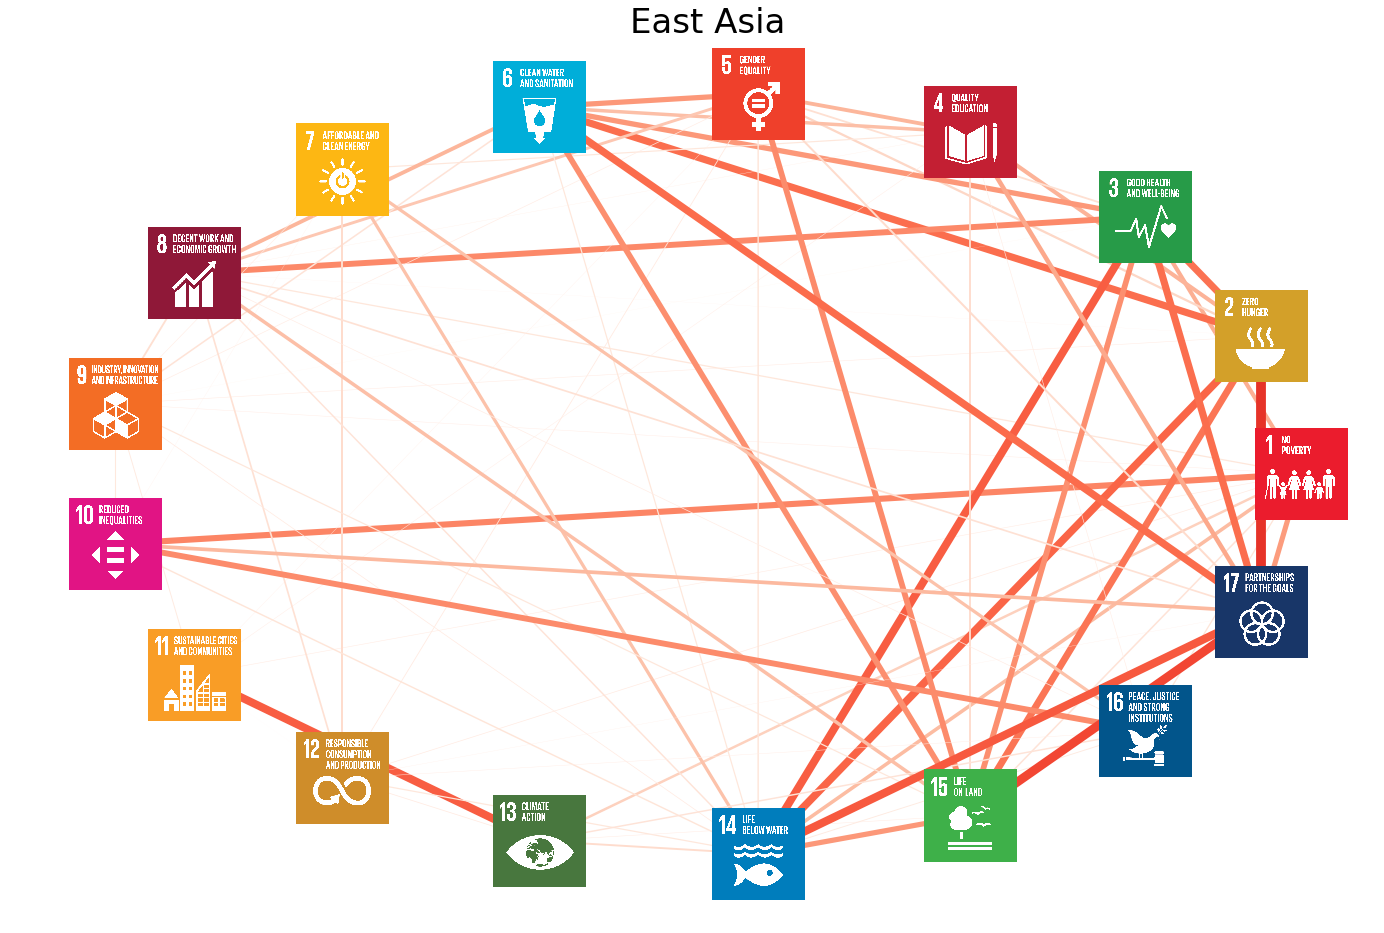

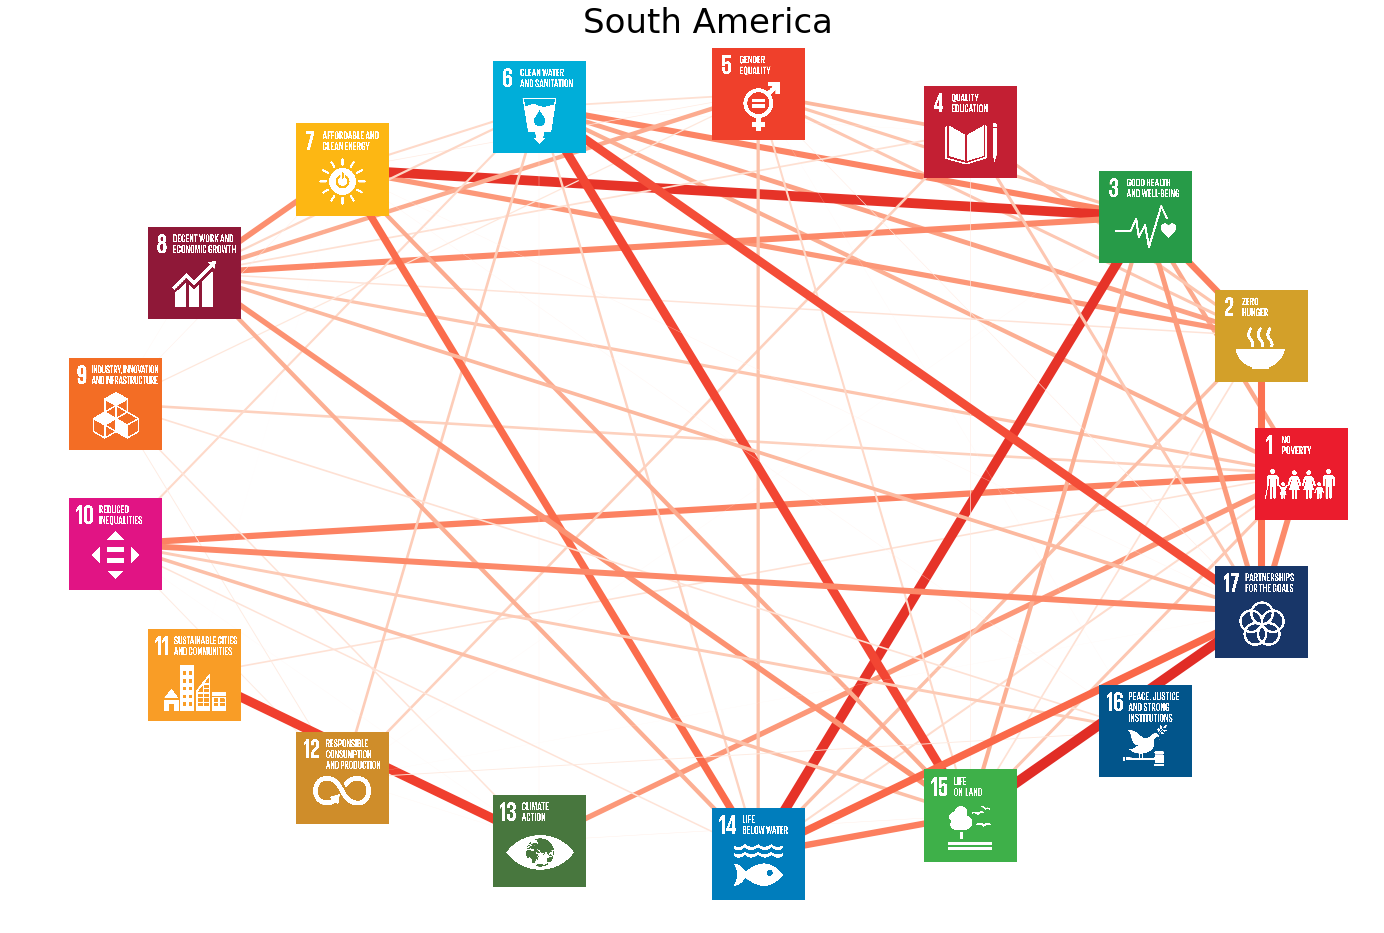

In [67]:
# plotting networks with weighted edges
for continent in cor_goals_continents_2.keys():
    G = nx.Graph()

    for key, value in dcor_dict_g[continent].items():
        G.add_edge(int(key[0]), int(key[1]), weight=value/2, color=sns.color_palette("Reds", 100)[int(np.around(value*100))], alpha=value)
        
    pos = nx.circular_layout(G)
    
    plt.figure(figsize=(24,16))

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=46, font_family='sans-serif')


    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]

    nx.draw_networkx(G, pos, with_labels=False, edges=edges, edge_color=colors, node_color='white', node_size=1000, width=np.multiply(weights,30))

    ax=plt.gca()
    fig=plt.gcf()
    trans = ax.transData.transform
    trans_axes = fig.transFigure.inverted().transform
    imsize = 0.08    # this is the image size
    plt.title('{}'.format(continent), fontdict={'fontsize': 34})

    for node in G.nodes():
        (x,y) = pos[node]   
        xx,yy = trans((x,y)) # figure coordinates
        xa,ya = trans_axes((xx,yy)) # axes coordinates
        a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize])
        a.imshow(mpimg.imread('utils/images/E_SDG goals_icons-individual-rgb-{}.png'.format(node)))
        a.axis('off')


    plt.axis('off')
    ax.axis('off')
    
    plt.savefig('distance_cor/goals/{}_circular_network_logos.png'.format(continent), format='png')

    plt.show()

### Maximum dcor on target-level equal to goal-level dcor

Since it could happen that there are very strong dependencies between two targets of two different goals, but the dependency over all targets of two goals is small, we take additionally the highest distance correlation between any two targets of two goals as the distance correlation between these two goals. 

In [ ]:
max_dcor = {}
                  
for continent in continents:
    max_dcor[continent] = pd.DataFrame(index=goals, columns=goals)
    
    for goalcombination in goalcombinations:
        max_dcor[continent].loc[goalcombination[1], goalcombination[0]] = 0
        
        for target_0 in dict_goals[goalcombination[0]]:
            for target_1 in dict_goals[goalcombination[1]]:
                
                dcor = cor_targets_continents_2[continent].loc[target_1, target_0]
                if dcor > max_dcor[continent].loc[goalcombination[1], goalcombination[0]]:
                    max_dcor[continent].loc[goalcombination[1], goalcombination[0]] = dcor

In [ ]:
# check
max_dcor['Europe']

In [ ]:
# better save these precious data
g_cor = open('distance_cor/goals/dcor_goals_max.pkl', 'wb')
pickle.dump(max_dcor, g_cor)
g_cor.close()

## Visualisation on goal-level
Additionally to the matrices with numbers, we would also like to visualise these matrices and plot these correlations as networks.

In [ ]:
# continents
for continent in continents:
    # generate a mask for the upper triangle
    mask = np.zeros_like(max_dcor[continent].fillna(0), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # set up the matplotlib figure
    f, ax = plt.subplots(figsize=(25, 22))

    # generate a custom diverging colormap
    cmap = sns.color_palette("Reds", 100)

    # draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(max_dcor[continent].fillna(0), mask=mask, cmap=cmap, vmax=1, center=0.5, vmin=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .8})
    
    plt.title('{}'.format(continent), fontdict={'fontsize': 32})
    plt.savefig('distance_cor/goals/{}_dcor_goals_max.png'.format(continent))

Additionally to these matrices we also plot the distance correlations as networks.

In [ ]:
# data preparation for networkX
max_dcor_dict = {}

for continent in max_dcor.keys():
    max_dcor_dict[continent] = {}

    for goalcombination in goalcombinations:
        max_dcor_dict[continent][goalcombination] = max_dcor[continent].loc[goalcombination[1], goalcombination[0]]

In [ ]:
# plotting networks with weighted edges
for continent in max_dcor.keys():
    G = nx.Graph()

    for key, value in max_dcor_dict[continent].items():
        G.add_edge(int(key[0]), int(key[1]), weight=value/2, color=sns.color_palette("Reds", 100)[int(np.around(value*100))], alpha=value)
        
    pos = nx.circular_layout(G)
    
    plt.figure(figsize=(24,16))

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=46, font_family='sans-serif')


    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]

    nx.draw_networkx(G, pos, with_labels=False, edges=edges, edge_color=colors, node_color='white', node_size=1000, width=np.multiply(weights,30))

    ax=plt.gca()
    fig=plt.gcf()
    trans = ax.transData.transform
    trans_axes = fig.transFigure.inverted().transform
    imsize = 0.08    # this is the image size
    plt.title('{}'.format(continent), fontdict={'fontsize': 34})

    for node in G.nodes():
        (x,y) = pos[node]   
        xx,yy = trans((x,y)) # figure coordinates
        xa,ya = trans_axes((xx,yy)) # axes coordinates
        a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize])
        a.imshow(mpimg.imread('utils/images/E_SDG goals_icons-individual-rgb-{}.png'.format(node)))
        a.axis('off')


    plt.axis('off')
    ax.axis('off')
    
    plt.savefig('distance_cor/goals/{}_circular_network_logos.png'.format(continent), format='png')

    plt.show()